In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.feature_selection import SelectKBest   #ricordali di toglierli nel caso non servono 
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from function import *
np.random.seed(0)
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

# Loding data and Data Preparation

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of the cortex. Eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

We first read the dataset and print the head to have a look od the dataset. In ordert to have a look to the dataset we can also print the info of the dataset. In this case we can see that there aren't missing values and all columns, except for the ***class*** column are float64. We can also see that the shape of our  *training dataset* is (367, 77), this means that our training dataset contrains  *367 samples* and *77 features*.

In [2]:
train = pd.read_csv("Data/train.csv")
print('Shape: ', train.shape)
train.head()
#train.info()

Shape:  (367, 77)


DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.650511  1.158653  0.580172  2.230388  3.179675  0.533686  0.440101   
1  0.365907  0.651296  0.810468  2.597217  4.131603  0.537554  0.249235   
2  0.260145  0.397996  0.229522  2.643311  4.303648  0.268394  0.050916   
3  0.239489  0.271240  0.766816  1.872419  2.424971  0.322269  0.386791   
4  0.617112  0.751737  0.050685  2.356175  3.494138  0.506875  0.310644   

   pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N     pS6_N   pCFOS_N  \
0   5.033898  0.200985  1.589221  ...  0.047287  0.337121  0.203356  0.191360   
1   6.099538  0.226362  1.700578  ...  0.521112  0.419544  0.231619  0.393897   
2   3.130455  0.273792  2.534531  ...  0.047407  0.053130  0.096325  0.257402   
3   2.351832  0.034265  0.472725  ...  0.273651  0.162382  0.234056  0.180657   
4   3.855825  0.309879  1.033428  ...  0.172488  0.014086  0.191145  0.149622   

      SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N   class  
0  0.590874   0.112145  0.110109  0.160637  1.329248  t-CS-m  
1  0.252572   0.352687  0.085545  0.328537  1.008023  t-SC-s  
2  0.246015   0.203979  0.039188  0.008315  1.193634  c-SC-s  
3  0.351388   0.103896  0.302341  0.166020  0.689970  c-CS-m  
4  0.310434   0.151685  0.180055  0.383039  1.737274  t-CS-s  

[5 rows x 77 columns]

## Preliminary Analysis 

### Data visualizzation 
In order to have an idea of our data, we can plot them to see if they are correleted. We can think of using the pairplot to show how each feature is correlated to the other but this is "impossible" (high computational cost) due to the high number of features. 
Let's first have a look to the number of mouse divided according to their genotype. The number of *Trisomic* mouse is greater with respect to the *Control*. So our dataset is not 

Number of trisomic mouse is 210 that is the 57% of the training set
Number of trisomic mouse is 157 that is the 43% of the training set


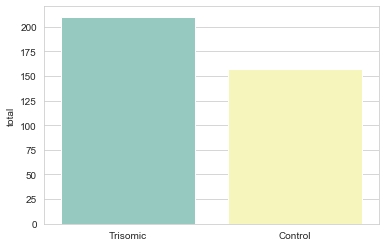

In [3]:
#plotting the number of mouse divided in 'control' and 'trisomy'
trisomic = train['class'].str.contains("t-")
control = train['class'].str.contains("c-")

tot_trisomic = sum(trisomic)
tot_control = sum(control)
print('Number of trisomic mouse is', tot_trisomic, 
      'that is the {0:.0f}%'.format(100*tot_trisomic/train.shape[0]),'of the training set')
print('Number of trisomic mouse is', tot_control, 
      'that is the {0:.0f}%'.format(100*tot_control/train.shape[0]),'of the training set')

trisomic_vs_control = pd.DataFrame({'Trisomic':[tot_trisomic], 'Control':[tot_control]}, index = ['total']).T
sns.barplot(x = ['Trisomic', 'Control'], y = "total", data = trisomic_vs_control, palette="Set3")

We can also plot the number of samples divided in 8 classes.
* c-CS-s : control mice, stimulated to learn, injected with saline
* c-CS-m : control mice, stimulated to learn, injected with memantine
* c-SC-s : control mice, not stimulated to learn, injected with saline
* c-SC-m : control mice, not stimulated to learn, injected with memantine
* t-CS-s : trisomy mice, stimulated to learn, injected with saline
* t-CS-m : trisomy mice, stimulated to learn, injected with memantine
* t-SC-s : trisomy mice, not stimulated to learn, injected with saline
* t-SC-m : trisomy mice, not stimulated to learn, injected with memantine


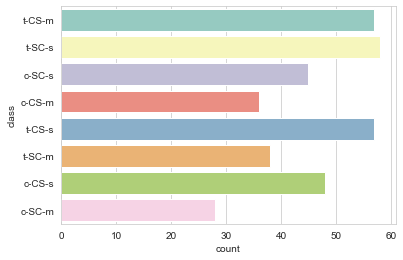

In [4]:
# number of samples the 8 classes
#sns.countplot(train['class'])
sns.countplot(y = "class", data = train, palette="Set3")

## Class Labels

In order to use machine learning algorithm we have to encode our categorical data in numerical data. This can be done using different tecnique(one-hot encofing, label encoding), here we will use the label encoding tecnique that just assign an increasing number to the classes. So in our case this tecnique will assign a number from 0 to 7 to our 8 classes. This is done using the *LabelEncoder()* function in sklearn. 

**Note: *assigning a progressive number to the class could lead to some problems, for example a machine learning algorith could think that the class labeled with a 3 is 'greater' than a class labeled with a 1. Anyway this seems to doen't have impact in our particular cases, so we will use this procedure to keep things simple.***

For this reasons we will use the one-hot encoding just to visualize the correlation between the features and the 8 classes.

In [5]:
labelClass = train['class'] # the class column
le = preprocessing.LabelEncoder()
codedLabel = le.fit_transform(labelClass)  # fitta il trasformatore e mi ritorna le label 
train['class']  = le.fit_transform(train['class'])

In [6]:
dummies = pd.get_dummies(train['class'], prefix = 'class') 
train_corr = pd.concat([train, dummies], axis = 1)
train_corr.drop('class', axis = 1, inplace = True)

As we said the number of features is to high to visualize them using a pairplot. We can instead, plotting the correlation matrix.
As we can see using the correlation matrix the features are moderately correlated.

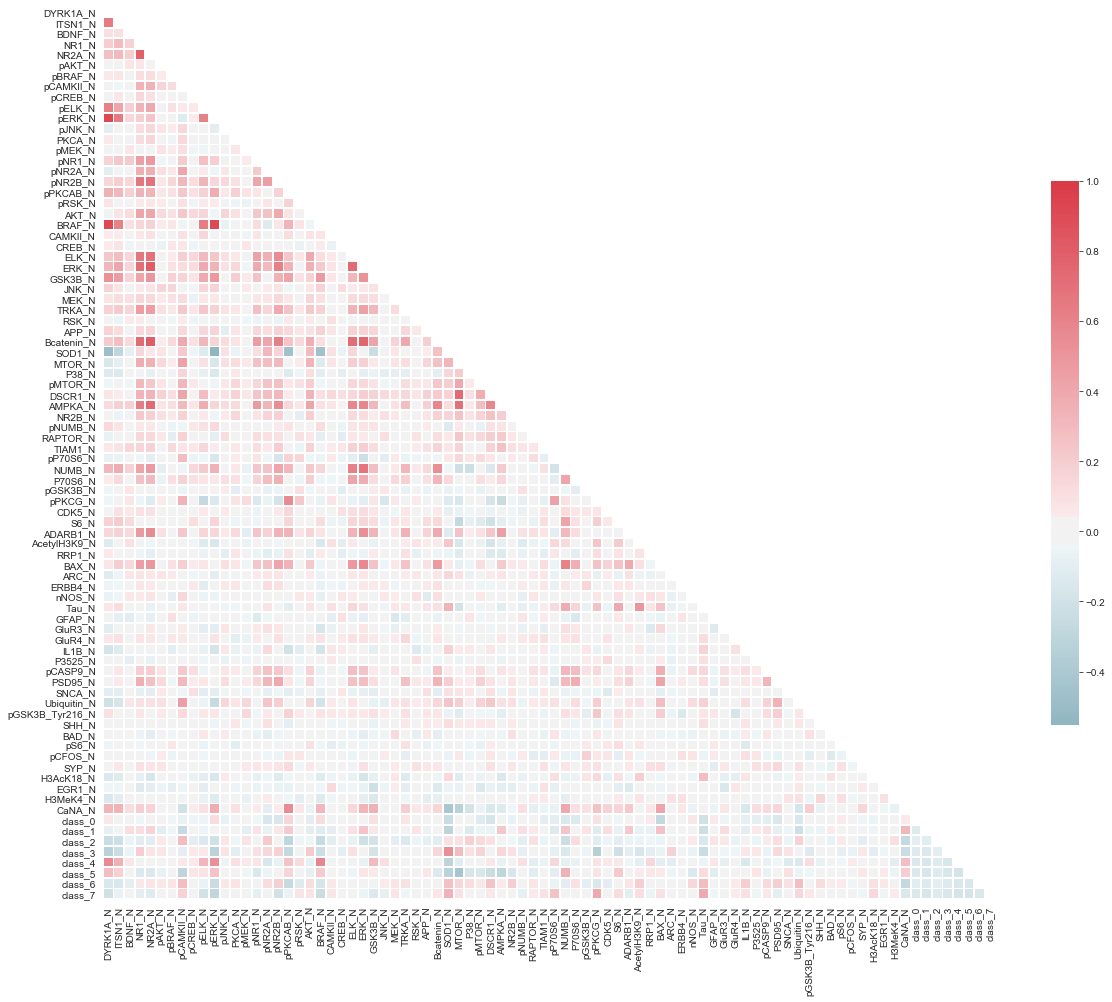

In [7]:
corrMatProva = train_corr.corr()
visualizeCorrMat(corrMatProva)

In [8]:
#corrMat = train.corr()
#visualizeCorrMat(corrMat)
corrMat = corrMatProva

Only six features have a correlation greater that 0.2 in particular only SOD1_N has a correlation of 0.351115 and Tau_N has a correlation of 0.554868.

Plotting the correlation with the classes we can see that only few features do an ok job in discriminate the classes. For example we can see that *class_05 mouse* tend to have slight lower expression of the protein MTOR_N.

The most important thing that we can understand looking to those plots is that not a single protein expression is able to discriminate the 8 classes. For this reason the features space of out classification problem will be
certainly greater than one.

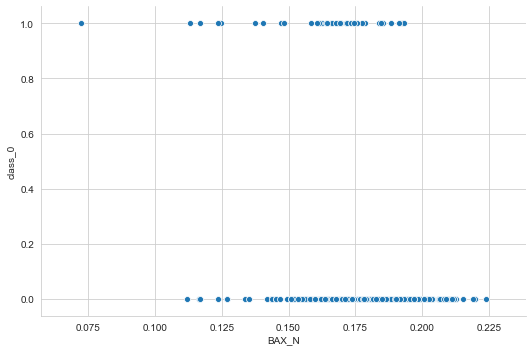

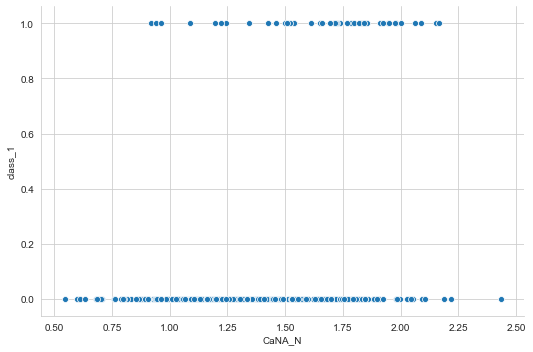

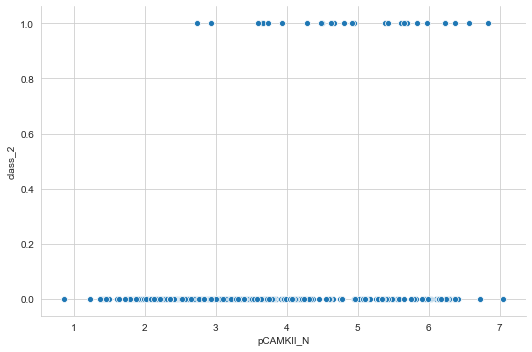

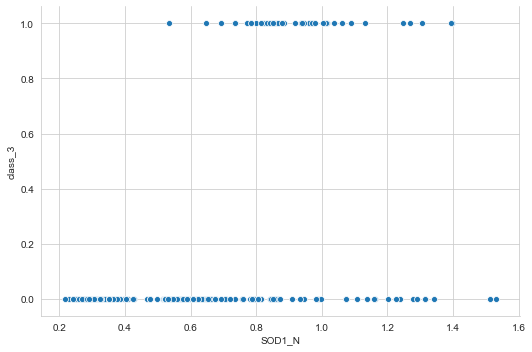

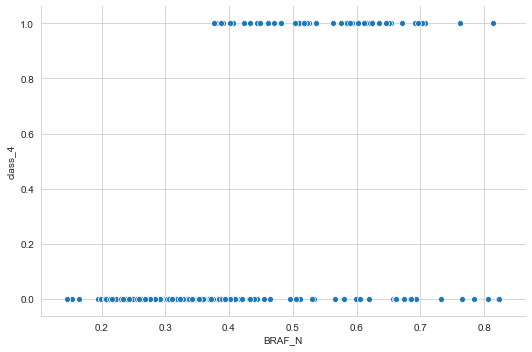

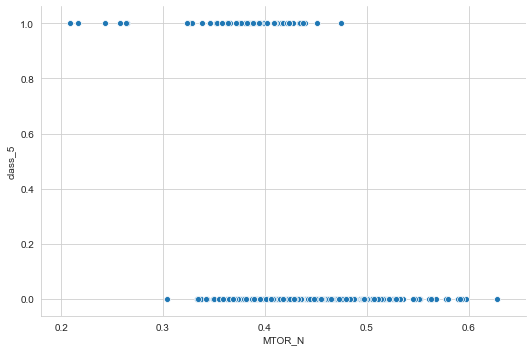

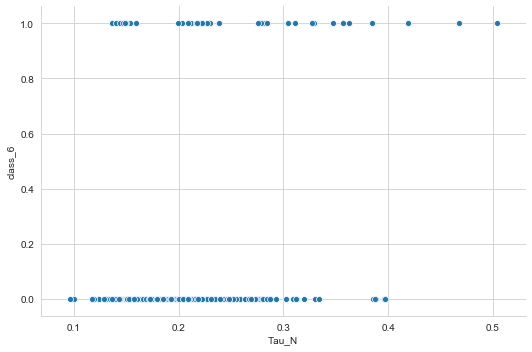

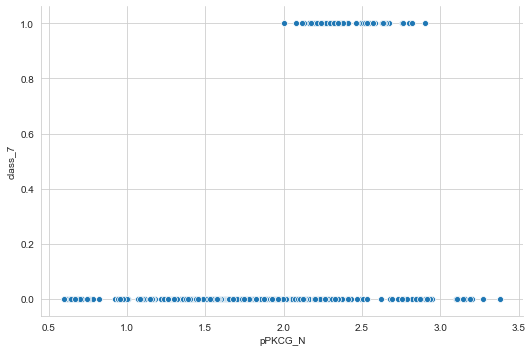

In [9]:
for item in dummies.columns:
    cor_target = abs(corrMat[item]).drop(item)   
    visualizeCorTarget(cor_target, cor_target.max(), train_corr, item)  

In [10]:
# we drop the target class
train = train.drop(columns = 'class', axis = 1)
# drop the SOD1_N
features_SOD1_N = train['SOD1_N']
train = train.drop(columns = 'SOD1_N', axis = 1)

## Variance visualizzation and normalizzation
It is always a good practice to analyze the variance of our features in order to understand if our data needs normalization. In particular in our dataset most of the features have  low variance between and other have very high variance, an example is Tau_N that has a variance of almost close to *5*. So in ordert to have all features in the same range we performe a normalizzation 
 
\begin{equation} \label{eq:normalization}
    z = \frac{(x_{i} - \mu) }{\sigma}
\end{equation}

This will speeds up our machine learning algorithm and makes our predictions more accurate giving alle features the same weight. 

Max Variance value :	 1.926769317467468
Min Variance value :	 0.00040275706051909544
Mean Variance value:	 0.09757634594471151


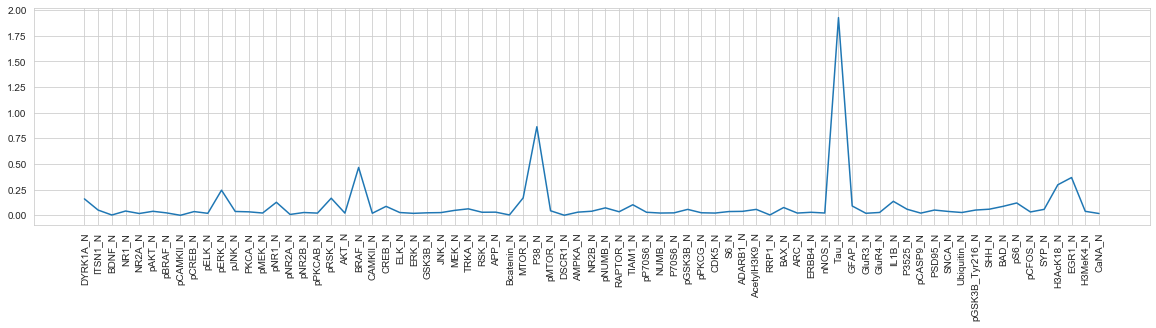

In [11]:

varianceVisualization(train)

Max Variance value :	 1.0027322404371597
Min Variance value :	 1.0027322404371575
Mean Variance value:	 1.0027322404371581


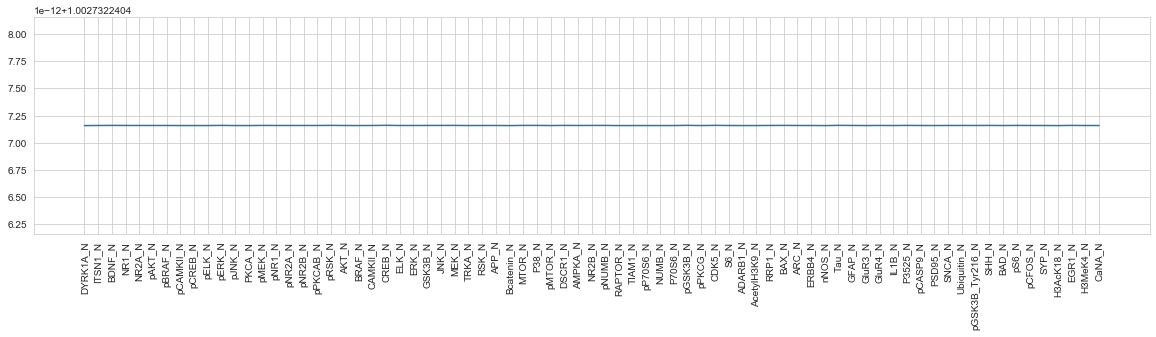

In [12]:
standard_scaler = preprocessing.StandardScaler().fit(train)
train = pd.DataFrame(standard_scaler.transform(train), columns = train.columns)
varianceVisualization(train)

We can now visualize the PCs to have a look of the number of dimension we need to separate our data. Let's calculate the PCs and visualize the persentage of variance expressed by each component

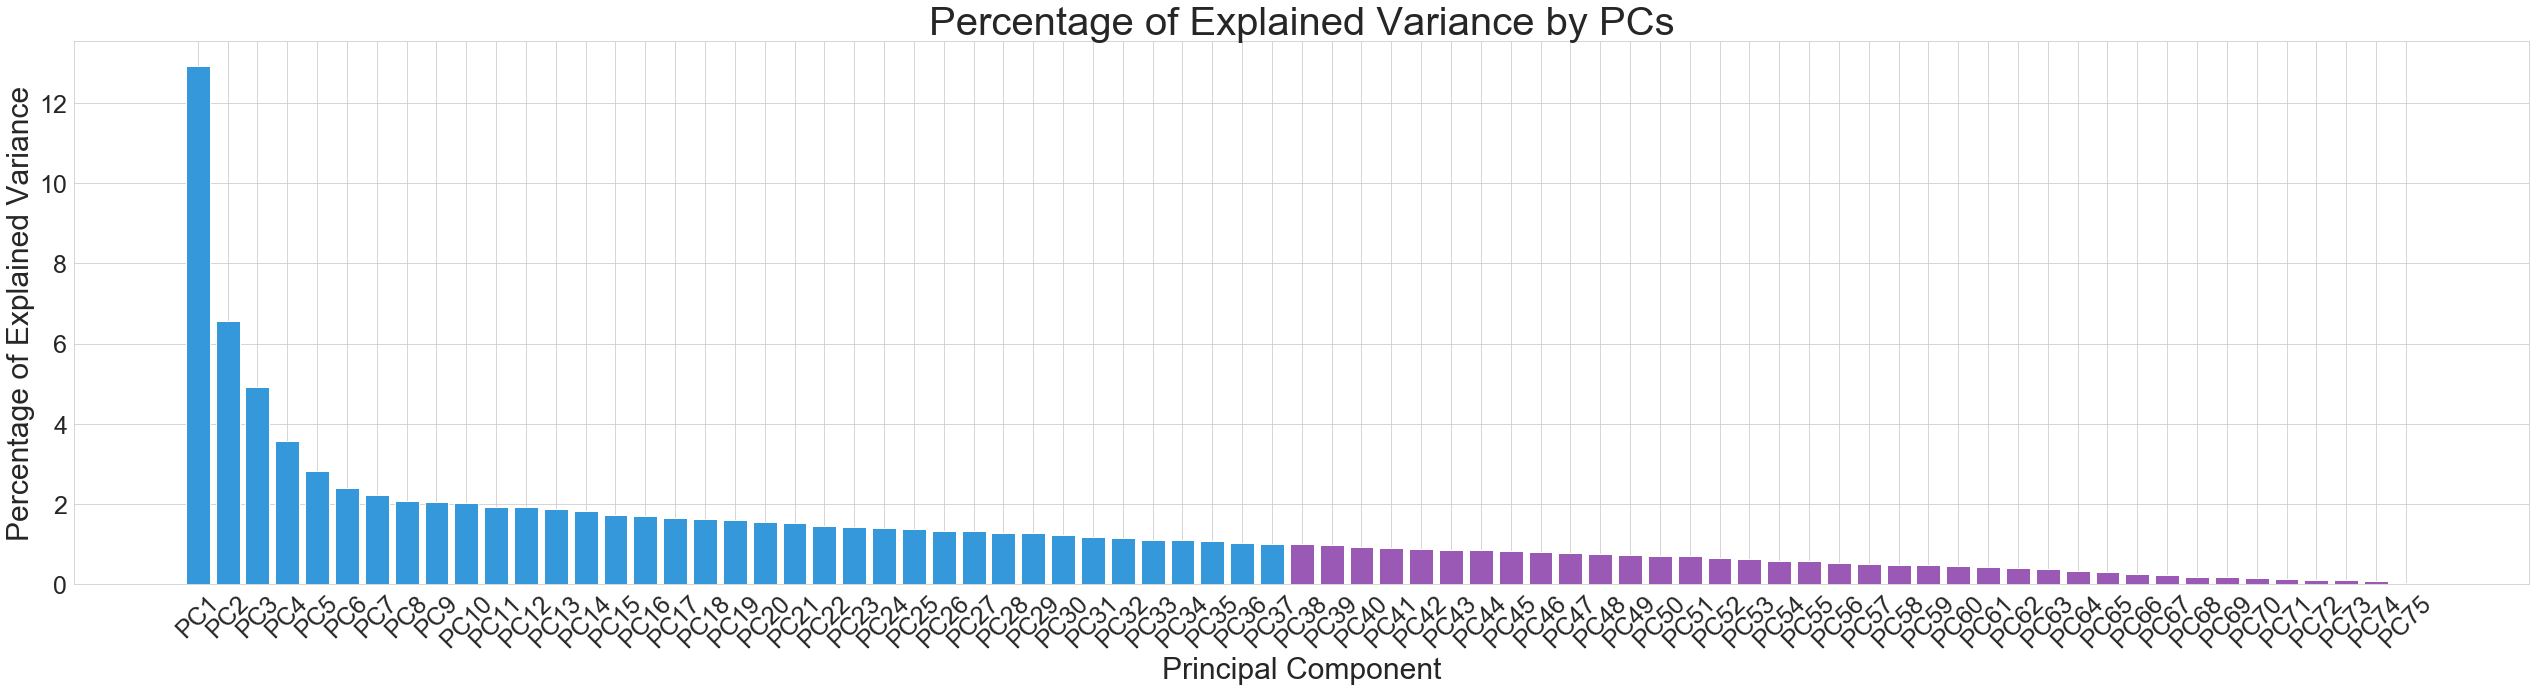

In [13]:
principalComp, per_var, singular_values = principalComponent(train, min(train.shape))
plot_labels = visualizeComponentVariance(per_var, 'Percentage of Explained Variance', 
                                         'Percentage of Explained Variance by PCs', per_var = per_var)

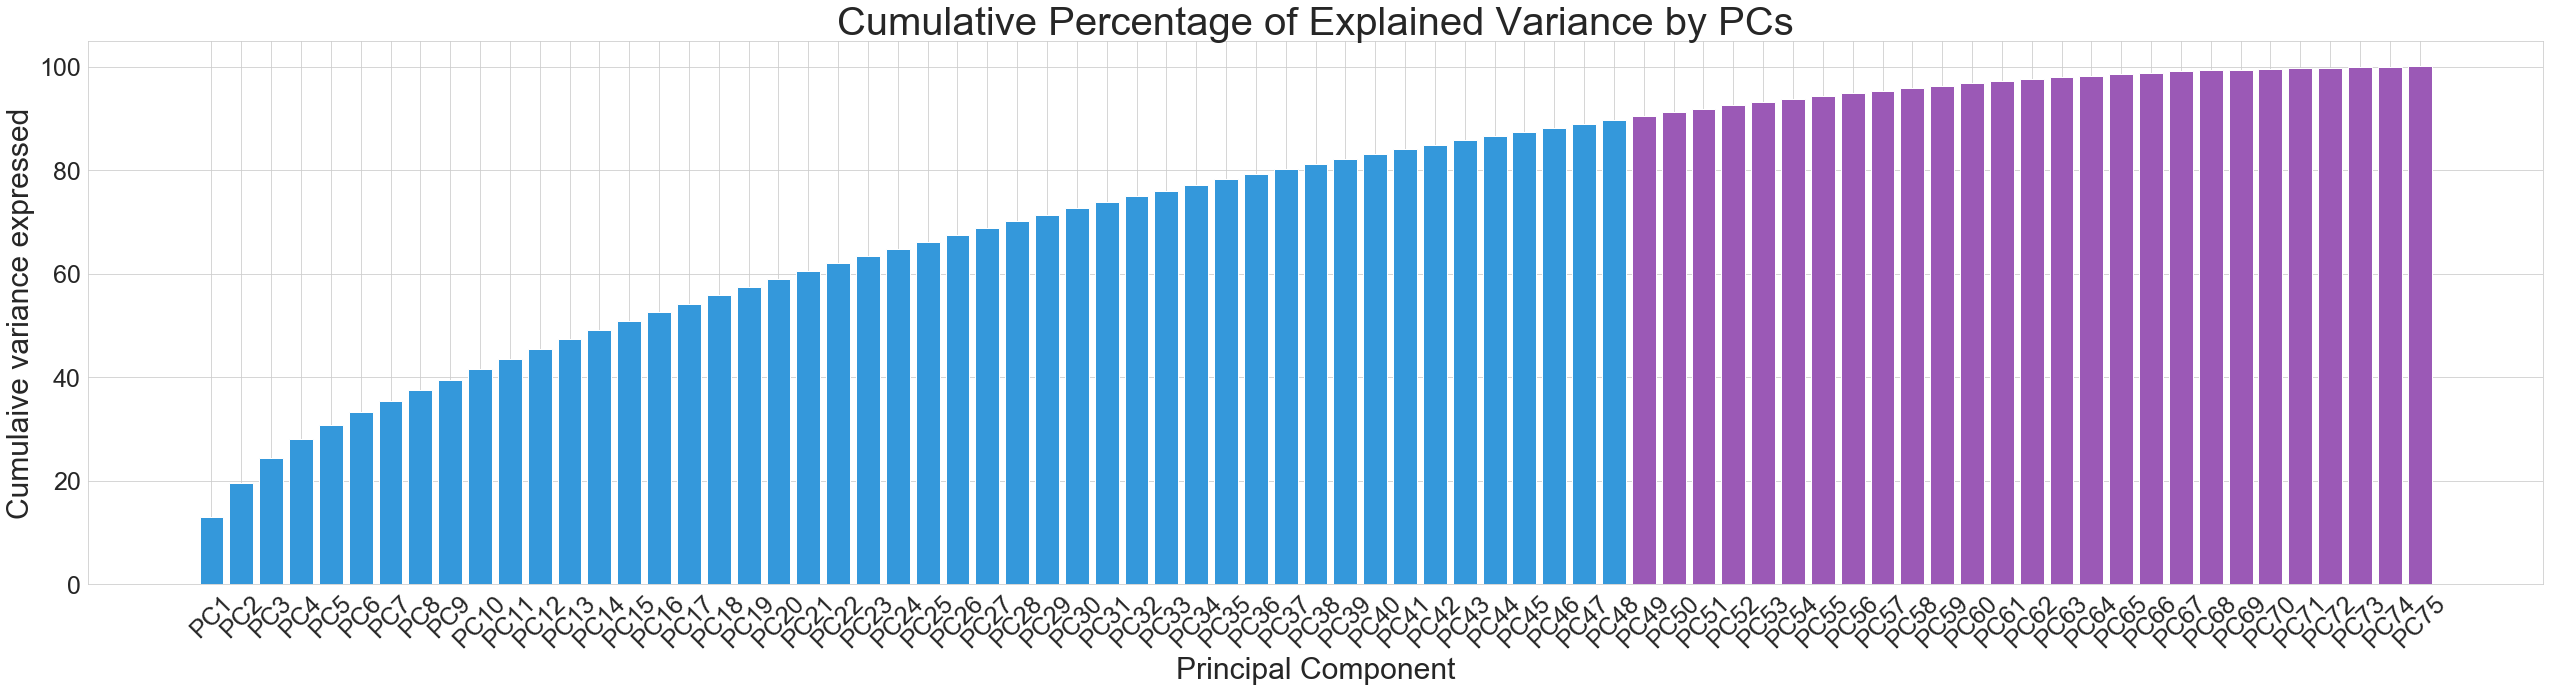

In [14]:
_ = visualizeComponentVariance(per_var.cumsum(), 'Cumulaive variance expressed', 
                           'Cumulative Percentage of Explained Variance by PCs', cum = True)

We can see that the percentage of variance expressed by each orincipal component is much and only with 48 PCs we reach a cumulative variance expressed equal to the 90%. Let's have a look to a plot using the first 3 PCs. This will shows that with only 3 PCs we can't perfectly separate the data.

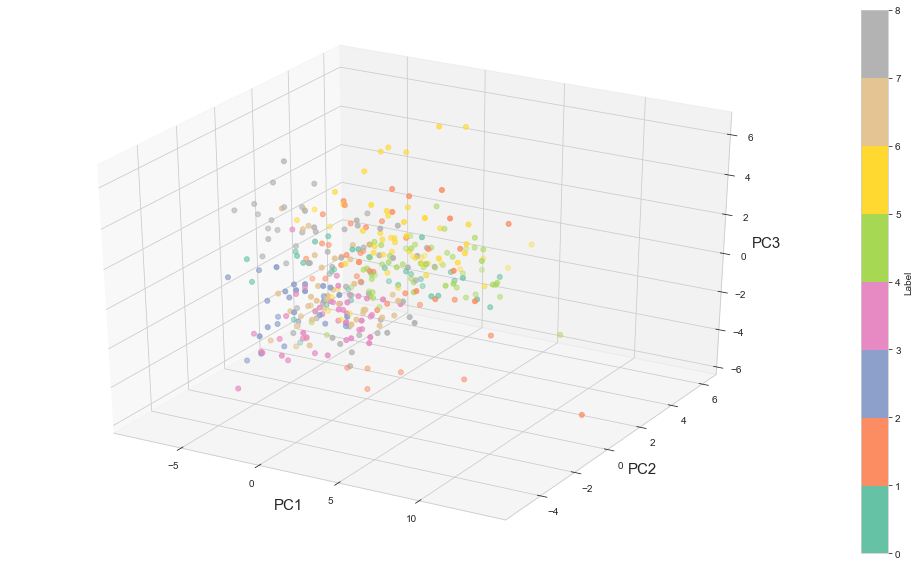

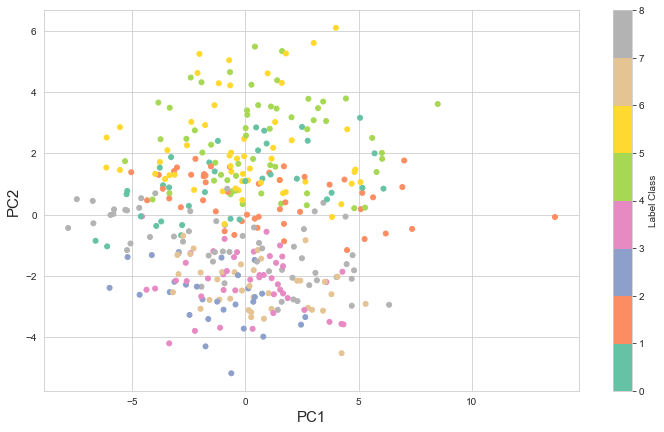

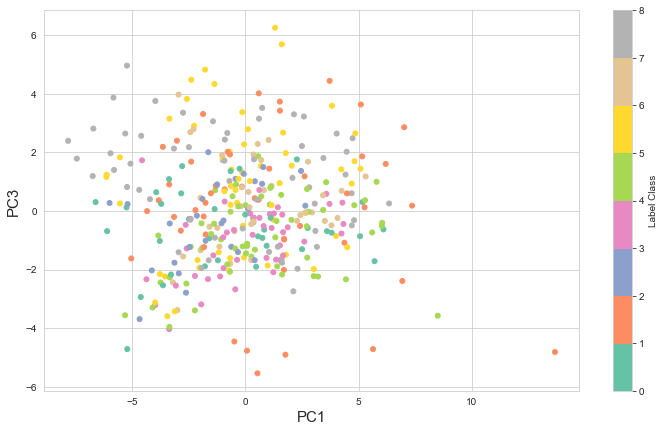

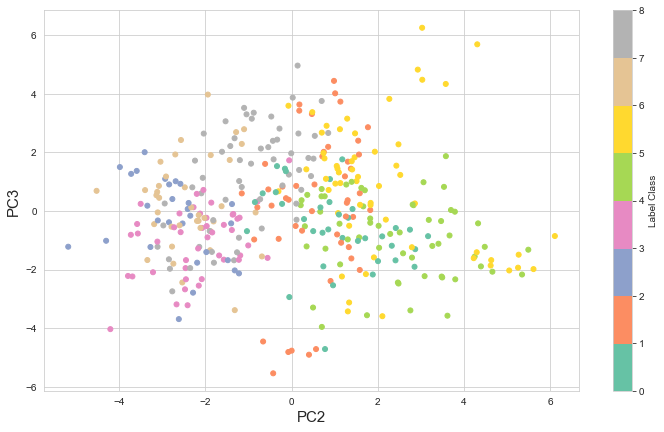

In [15]:
#per ora ho ignorato " _ " la percentuale di varianza espressa e i singular values
pc_plot, _, _ = principalComponent(train, 3)
pc_plot = pd.DataFrame(pc_plot, columns = plot_labels[0 : 3])

plotPCA(codedLabel, pc_plot)
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC2)
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC3)
plot2dPCA(codedLabel, pc_plot.PC2, pc_plot.PC3)

## Clustering

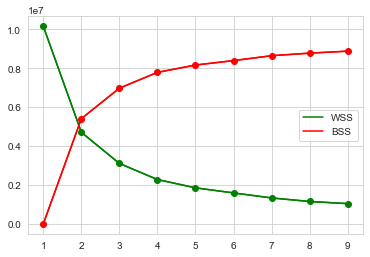

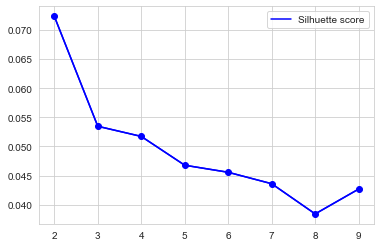

In [16]:
#KMEANS
from sklearn.cluster import KMeans

clus_list = list(range(1, 10))    
models_KM = []
for i in clus_list:
    models_KM.append(KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 42))
 
plotMetrics(train, models_KM)

Silhouette_score:  0.07233626521855845


0.731103245210819

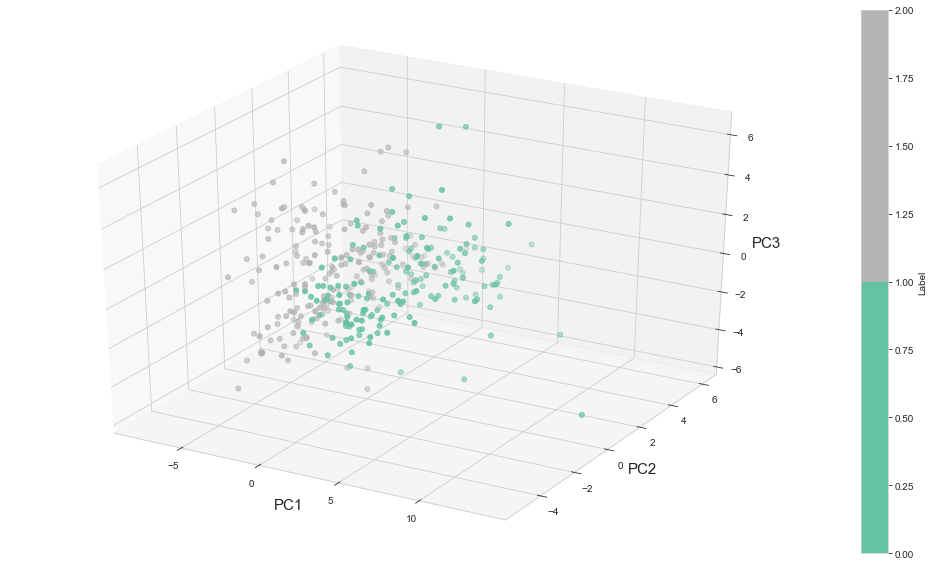

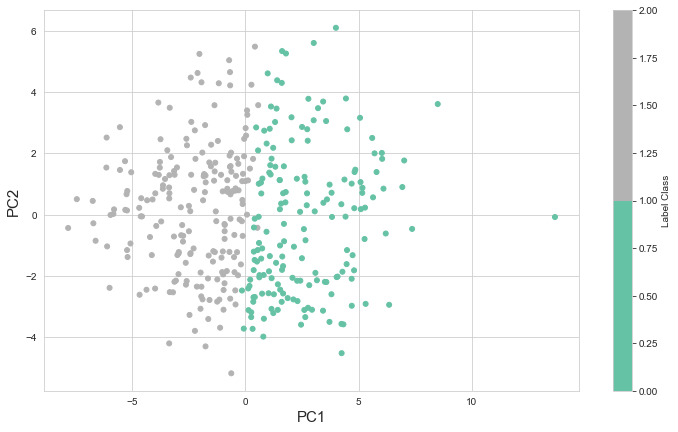

In [17]:
# according to the silhouette the best k = 2
k = 2
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
#y_predict = kmeans.fit_predict(train)

print("Silhouette_score: ", silhouette_score(train, kmeans.fit_predict(train), metric = 'euclidean'))
plotPCA(kmeans.fit_predict(train), pc_plot)
plot2dPCA(kmeans.fit_predict(train), pc_plot.PC1, pc_plot.PC2)
correlation(train, kmeans.fit_predict(train), 'euclidean')


DBSCAN(algorithm='auto', eps=4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=1, n_jobs=None, p=None)

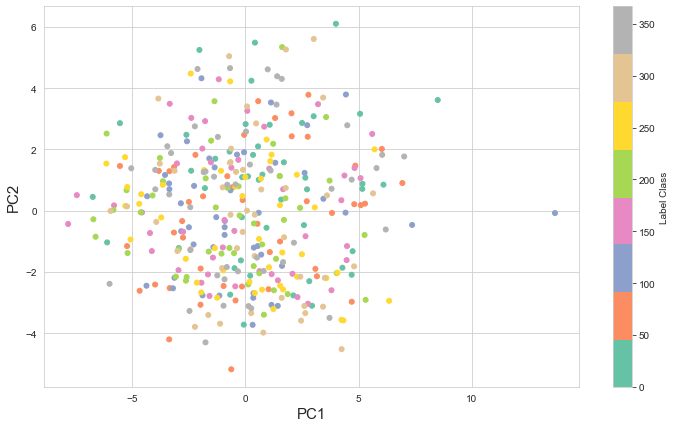

In [18]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 4, min_samples = 1)
dbscan.fit(train)
#dbscan.labels_
y_predict_dbscan = dbscan.fit_predict(train)
#plotPCA(y_predict_dbscan, pc_plot)
plot2dPCA(y_predict_dbscan, pc_plot.PC1, pc_plot.PC2)

In [19]:
leaf_size = list(range(1, 100))
n_neighbors = list(range(1, 300))
p = [1,2]
algorithm = ['ball_tree', 'kd_tree', 'brute']

#Convert to dictionary
hyperparameters = dict(n_neighbors = n_neighbors, p = p, algorithm = algorithm)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(estimator =  knn_2, param_grid = hyperparameters, cv = 10, n_jobs =-1)
#Fit the model
best_model = clf.fit(train,codedLabel)
print('Best leaf_size:', best_model.best_estimator_.get_params())


Best leaf_size: {'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}


In [20]:
bestKnn =  best_model.best_estimator_

Text(0.5, 0, 'Points sorted according to the 12th NN Diatance')

Text(0, 0.5, '12th NN Diatance')

The labels are:	 {0}


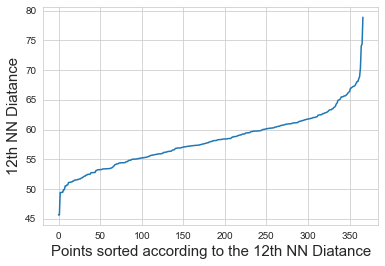

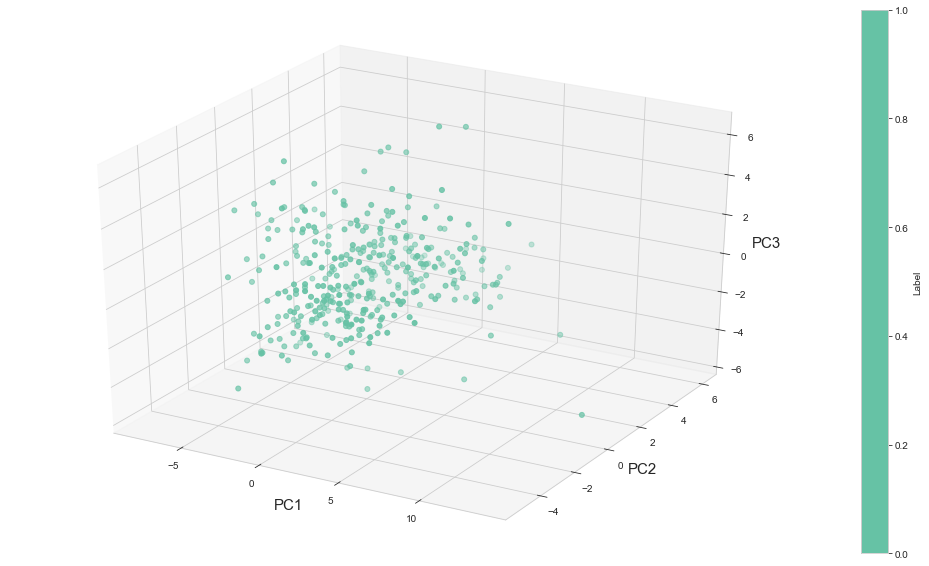

In [21]:
neigh = NearestNeighbors(n_neighbors = bestKnn.n_neighbors, leaf_size = bestKnn.leaf_size, p = bestKnn.p)
nbrs = neigh.fit(train)


distances, _ = nbrs.kneighbors(train)
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.plot(distances)

plt.xlabel('Points sorted according to the ' + str(bestKnn.n_neighbors) +'th NN Diatance', size = 15)
plt.ylabel(str(bestKnn.n_neighbors) +'th NN Diatance' , size = 15)
#eps = 1.748428908
m = DBSCAN(eps = 63 , min_samples =  bestKnn.n_neighbors).fit(train)
print("The labels are:\t", set(m.labels_))

plotPCA(m.labels_, pc_plot)
#print("Silhouette_score: ", silhouette_score(train, m.labels_, metric = 'euclidean'))
#print("\nCorrelation: ")
#correlation(train, y_predict_agg , 'euclidean')

## Features Selection

def selectFeatures(X, y):
    # Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel = "linear")
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator = svc, step = 1, cv = StratifiedKFold(10),
                  scoring = 'accuracy')
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure(figsize = (15, 10))
    plt.xlabel("Number of features selected", size = 15)
    plt.ylabel("Cross validation score (# of correct classifications)",  size = 15)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, marker = 'o')
    plt.show()
    return rfecv


Optimal number of features : 11


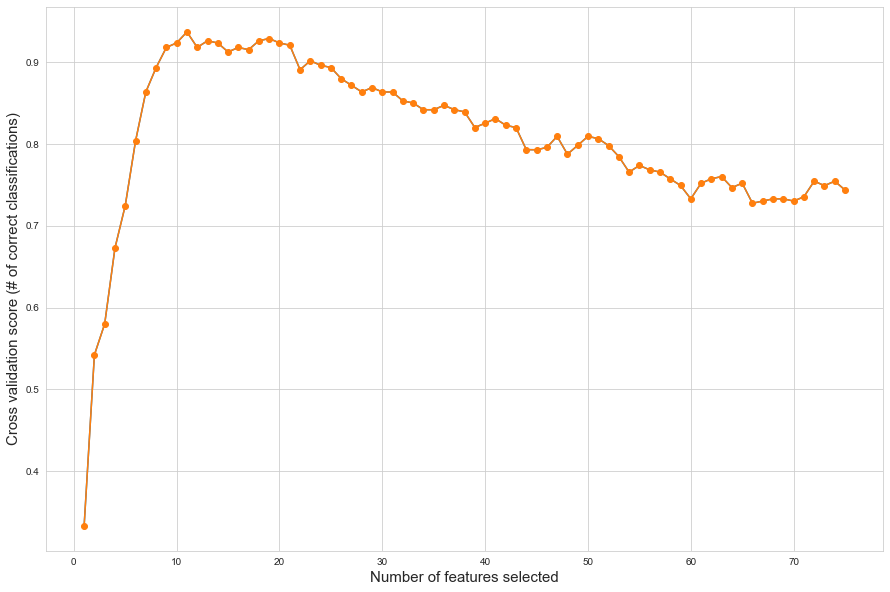

In [22]:
rfecv = selectFeatures(train, codedLabel)

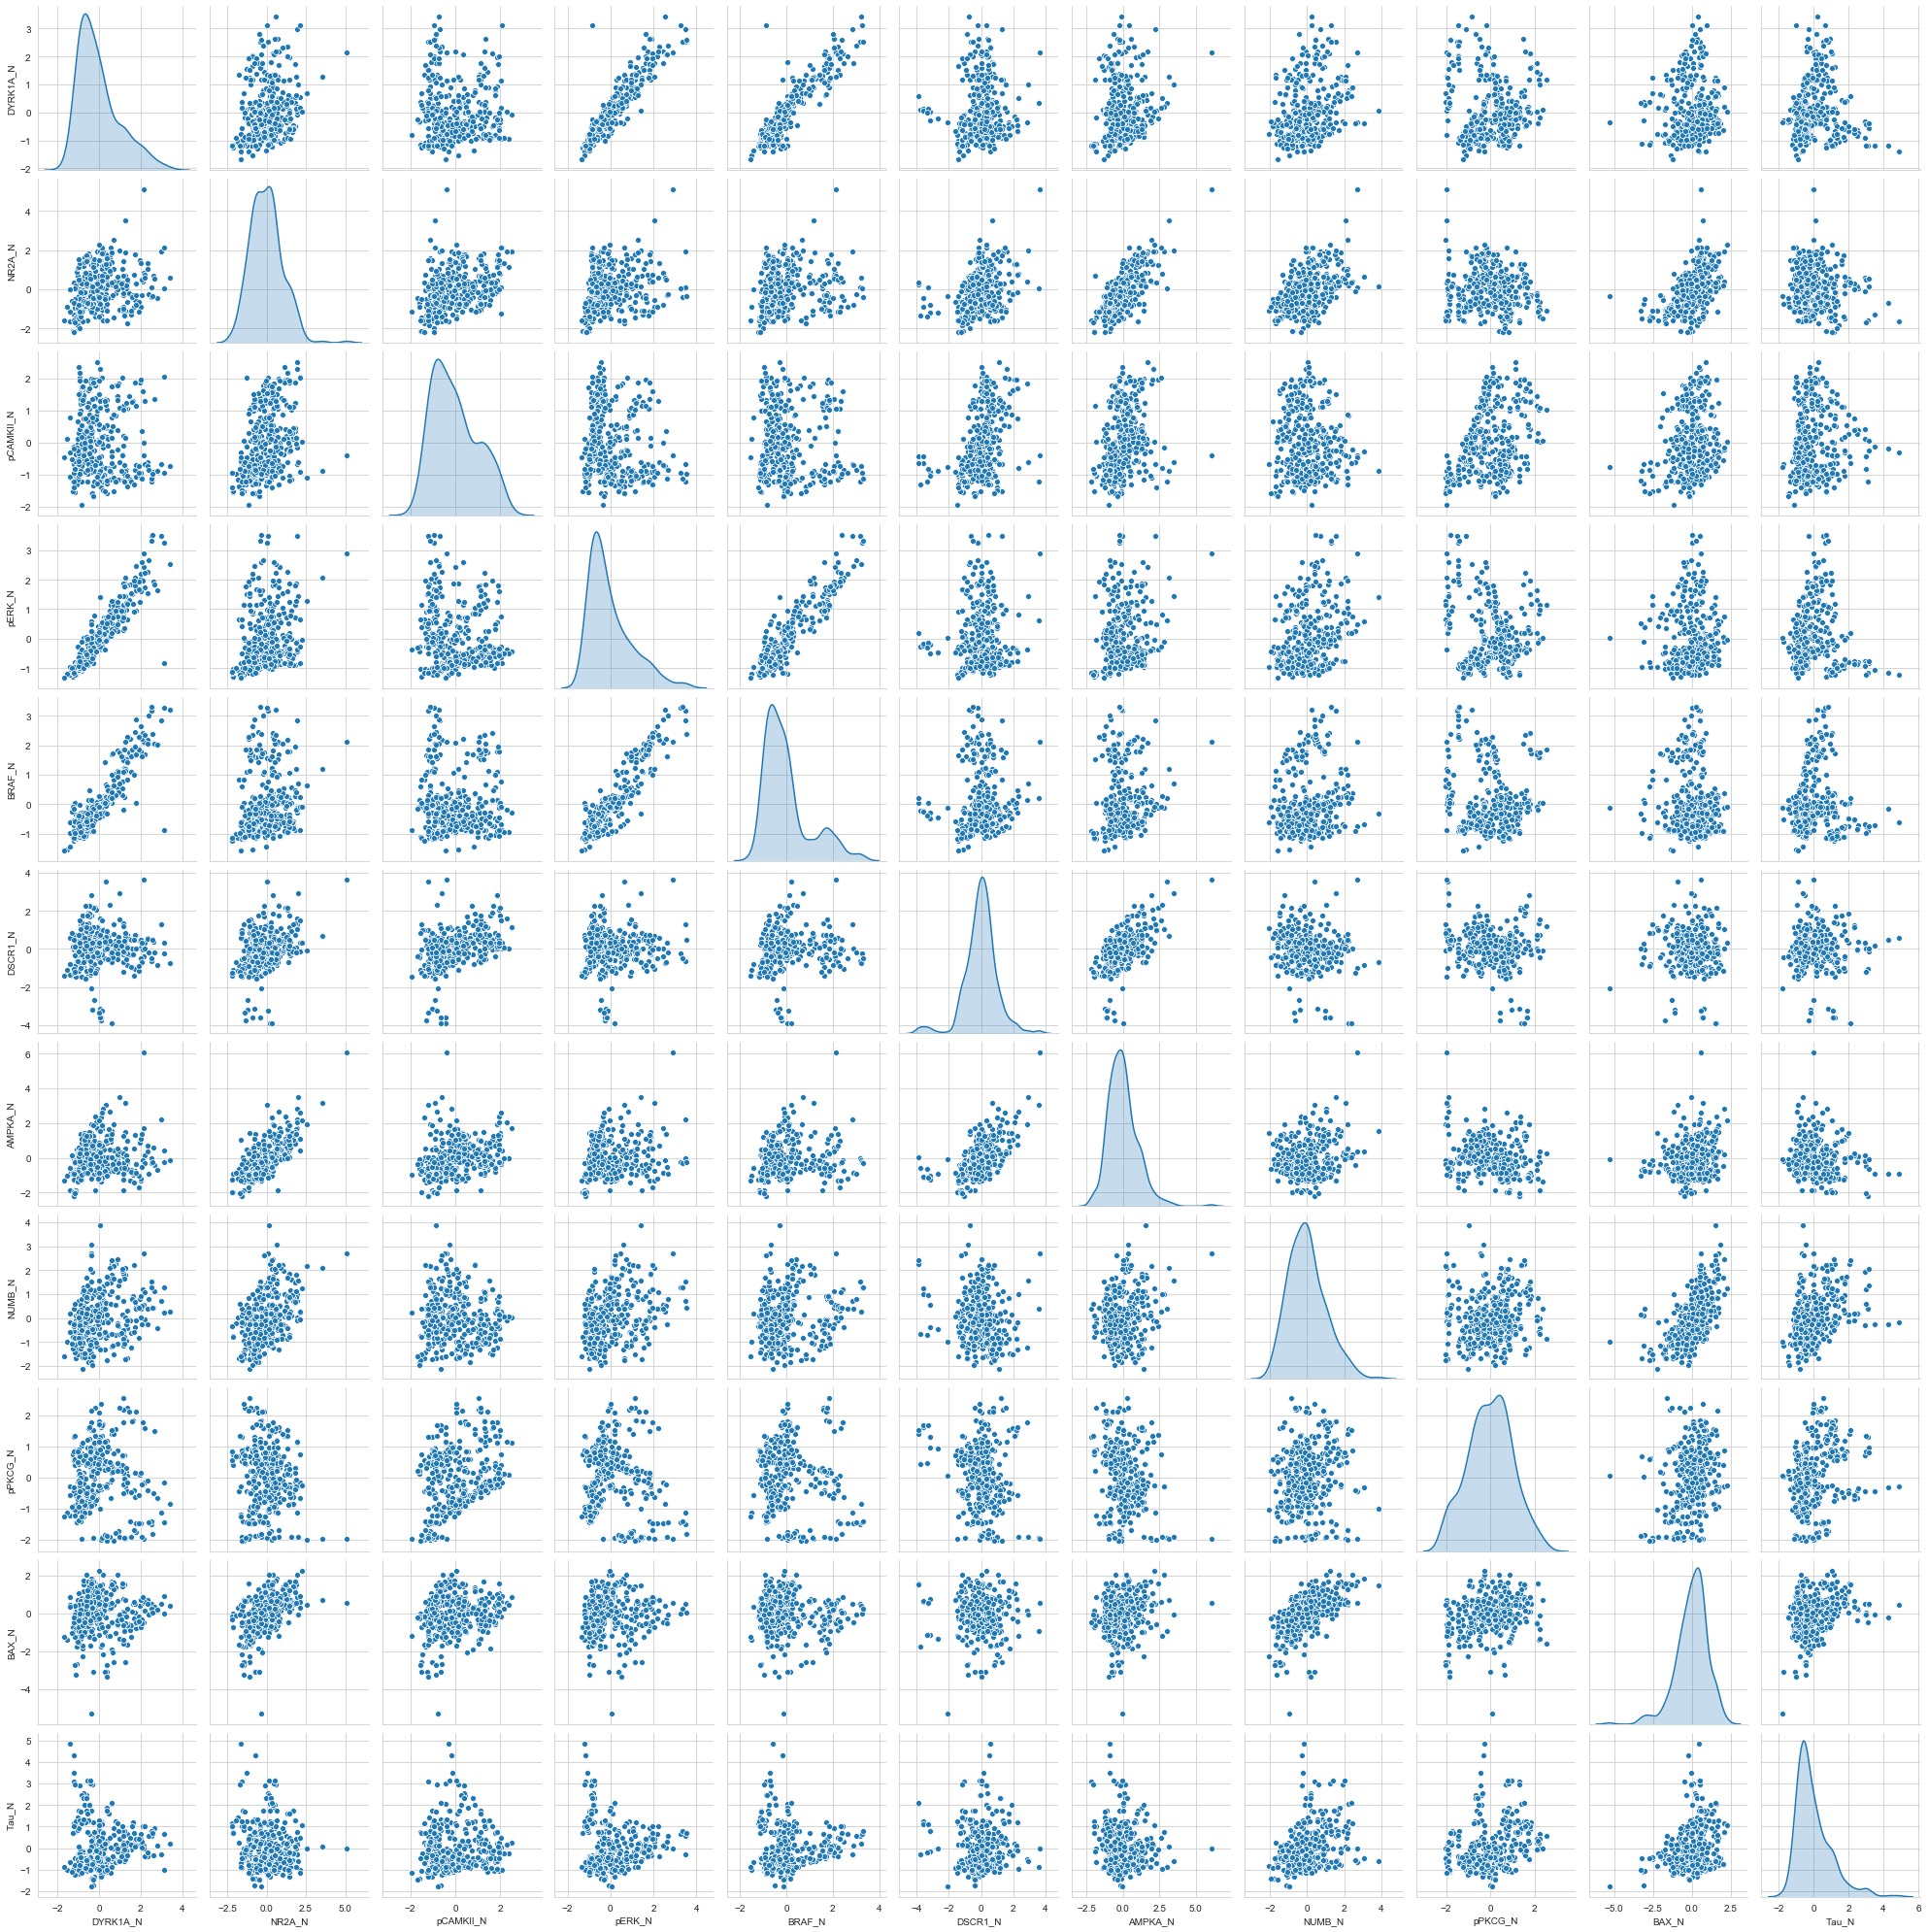

In [23]:
selectedTrain = train[train.columns[rfecv.get_support()]]
sns.pairplot(selectedTrain, diag_kind = "kde")

# Classification

In [24]:
train_x, validation_x, train_y, validation_y = train_test_split(selectedTrain, codedLabel, 
                                                                test_size = 0.20)
print("Shape if train : ", train_x.shape)
print("Shape if train label : ",train_y.shape)
print("Shape if validation : ",validation_x.shape)
print("Shape if validation label : ",validation_y.shape)

Shape if train :  (293, 11)
Shape if train label :  (293,)
Shape if validation :  (74, 11)
Shape if validation label :  (74,)


In [25]:
#model selection 


classifiers = {"Nearest 5Neighbors": KNeighborsClassifier(5), 
               "Logistic Regression" : LogisticRegression(),
               "LDA":  LDA(), "QDA": QDA(), "SVM linear": SVC(kernel = "linear")}

modelScore = {}

for name, model in classifiers.items():
    print("Name: ", name)
    score = cross_val_score(model, train_x, train_y, scoring = 'accuracy', cv = 10)
    #print("List of scores : ", score, "\n")
    print("Mean Score: ", score.mean(), "\n")
    modelScore = {name : score.mean()}
    modelScore.update(modelScore)
    

Name:  Nearest 5Neighbors
Mean Score:  0.8295402298850576 

Name:  Logistic Regression
Mean Score:  0.8768965517241378 

Name:  LDA
Mean Score:  0.8329885057471265 

Name:  QDA
Mean Score:  0.9385057471264368 

Name:  SVM linear
Mean Score:  0.9181609195402298 



In [26]:
param_gridQDA = [{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}]

gridSerarchQDA = GridSearchCV(QDA(), param_grid = param_gridQDA, 
                              return_train_score = True, 
                              cv = 10, n_jobs=-1).fit(train_x, train_y)
bestModelQDA = gridSerarchQDA.best_estimator_
cross_val_score(bestModelQDA, selectedTrain, codedLabel, scoring = 'accuracy', cv = 10).mean()



param_gridSVM = {'C': [0.1, 1, 10, 100, 1000],  
                 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                 'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
                 'shrinking' : [True, False],
                 'degree': range(1, 4)} 
            
gridSerarchSVM = GridSearchCV(SVC(probability = True), 
                              param_grid = param_gridSVM, 
                              return_train_score = True, 
                              cv = 10, n_jobs=-1).fit(train_x, train_y)



bestModelSVM = gridSerarchSVM.best_estimator_
cross_val_score(bestModelSVM, selectedTrain, codedLabel, scoring = 'accuracy', cv = 10).mean()


0.9428678678678679

0.9645645645645645

In [27]:
test = pd.read_csv("Data/test.csv")
test['class']  = le.fit_transform(test['class'])
coded_y = test['class']
test = test.drop(columns = ['class'], axis = 1)
test = pd.DataFrame(standard_scaler.transform(test), columns = test.columns)
test = test[train.columns[rfecv.get_support()]]
test.head()

DYRK1A_N    NR2A_N  pCAMKII_N    pERK_N    BRAF_N   DSCR1_N   AMPKA_N  \
0 -1.483693 -0.482341   0.685066 -1.096109 -1.477174 -0.914329 -0.715807   
1 -0.800832  0.909533   0.006090 -0.813230 -0.555945 -0.179249  0.481072   
2  1.173152  0.093866   0.984848  1.292872  1.819541 -0.916902 -0.156067   
3 -0.414899 -0.017894  -0.237780 -0.826456 -0.763414 -0.119895 -0.456987   
4 -1.310183 -0.770235  -0.784725 -1.036229 -1.038126 -1.448562 -1.696489   

     NUMB_N   pPKCG_N     BAX_N     Tau_N  
0 -0.887245 -0.980583 -0.565501 -1.000838  
1  0.281605 -0.631516  0.415084 -0.658263  
2 -0.699485  0.188994 -0.544938 -0.181360  
3  1.607719  0.918099  0.430499  3.387084  
4 -0.202110 -1.140365  0.966150 -0.471976

In [28]:
bestModelQDA.fit(selectedTrain, codedLabel)
bestModelSVM.fit(selectedTrain, codedLabel)

print('\n')
print('Test score : ', np.round(bestModelQDA.score(test, coded_y), decimals = 2))
print('Test score: ', np.round(bestModelSVM.score(test, coded_y), decimals = 2))

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.1,
                              store_covariance=False, tol=0.0001)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)



Test score :  0.96
Test score:  0.99


In [29]:
print(classification_report(coded_y, bestModelSVM.predict(test), target_names = set(labelClass)))

              precision    recall  f1-score   support

      c-CS-s       1.00      1.00      1.00        24
      c-SC-m       1.00      1.00      1.00        27
      t-SC-s       1.00      0.91      0.95        32
      c-SC-s       0.97      1.00      0.98        30
      t-CS-s       1.00      1.00      1.00        33
      c-CS-m       1.00      1.00      1.00        33
      t-SC-m       0.96      1.00      0.98        22
      t-CS-m       0.98      1.00      0.99        44

    accuracy                           0.99       245
   macro avg       0.99      0.99      0.99       245
weighted avg       0.99      0.99      0.99       245



In [30]:
#provo a fare la multilabel confusion matrix
#VEDERE MEGLIO
from sklearn.metrics import multilabel_confusion_matrix
cmL = multilabel_confusion_matrix(bestModelSVM.predict(test), coded_y)

(8, 8)

Confusion matrix Train


Confusion matrix TEST


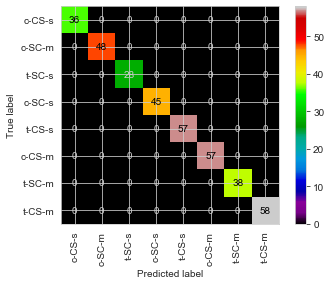

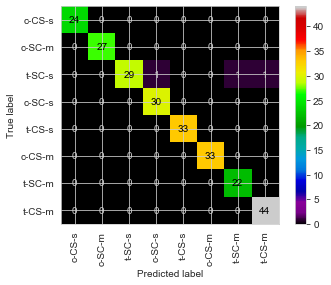

In [31]:
confMatrix = confusion_matrix(coded_y, bestModelSVM.predict(test))
confMatrix.shape
print('Confusion matrix Train')
plot_confusion_matrix(bestModelSVM, selectedTrain, codedLabel, 
                      display_labels = set(labelClass), xticks_rotation='90', cmap = 'nipy_spectral' )
print('Confusion matrix TEST')
plot_confusion_matrix(bestModelSVM, test, coded_y, 
                      display_labels=set(labelClass), xticks_rotation='90', cmap = 'nipy_spectral')

In [32]:

# DEVO VEDERE COME FARE LA COSA DELLA ROC CURVE



def plot_roc(predict_fn, X, y, label=None):
    fprs, tprs, t = roc_curve(y, predict_fn(X)[:, -1])
    # Plot the ROC
    plt.plot(fprs, tprs, label = "ROC " + label)
    plt.xlabel("FPR = 1 - specificity")
    plt.ylabel("TPR = sensitivity")
    plt.legend()
    
#plot_roc(bestModelSVM.predict_proba, selectedTrain, codedLabel, "SVM Train", )
#plot_roc(bestModelSVM.predict_proba, test, coded_y, "SVM Test")

## Regression 

In [33]:
trainRG = pd.read_csv("Data/train.csv").drop(columns = 'class', axis = 1)

In [34]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer
#data normalization standard
#scaler = StandardScaler().fit(trainRG)
#trainRG = pd.DataFrame(scaler.transform(trainRG), columns = trainRG.columns)

#data normalization MinMax
#scaler = MinMaxScaler().fit(trainRG)
#trainRG = pd.DataFrame(scaler.transform(trainRG), columns = trainRG.columns)

#data normalization robust_scale
scaler = RobustScaler().fit(trainRG)
trainRG = pd.DataFrame(scaler.transform(trainRG), columns = trainRG.columns)


#quantile transformation 
qt = QuantileTransformer(n_quantiles=100, random_state=0)
trainRG = pd.DataFrame(qt.fit_transform(trainRG), columns = trainRG.columns)

trainRG.head()
#y = trainRG['SOD1_N']
print('Inizial shape of train: ', trainRG.shape)

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.890290  0.969107  0.918951  0.417033  0.289431  0.929876  0.916203   
1  0.468509  0.528365  0.991241  0.772515  0.674057  0.938689  0.559161   
2  0.101032  0.176101  0.378017  0.808650  0.747510  0.570544  0.131183   
3  0.061337  0.066594  0.978215  0.122401  0.052445  0.699047  0.842441   
4  0.846777  0.670499  0.072560  0.544674  0.413890  0.906704  0.686653   

   pCAMKII_N   pCREB_N    pELK_N  ...  pGSK3B_Tyr216_N     SHH_N     BAD_N  \
0   0.800408  0.458834  0.758567  ...         0.647114  0.090837  0.783314   
1   0.941270  0.519472  0.823860  ...         0.136842  0.944090  0.901756   
2   0.454046  0.610193  0.990732  ...         0.800042  0.091049  0.149465   
3   0.237758  0.077194  0.005211  ...         0.208795  0.613594  0.430302   
4   0.639571  0.692721  0.183159  ...         0.021609  0.383763  0.018786   

      pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
0  0.595869  0.542324  0.758679   0.338325  0.277522  0.423740  0.461280  
1  0.642506  0.899397  0.154399   0.820136  0.193725  0.745578  0.142811  
2  0.297768  0.707215  0.148509   0.604496  0.078707  0.013361  0.312402  
3  0.649334  0.505596  0.311450   0.321430  0.768952  0.439385  0.019845  
4  0.558159  0.430650  0.242964   0.466432  0.493599  0.822371  0.807531  

[5 rows x 76 columns]

Inizial shape of train:  (367, 76)


(367, 76)

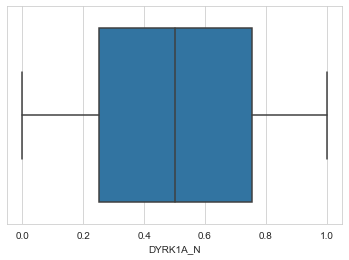

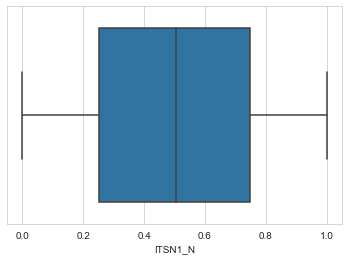

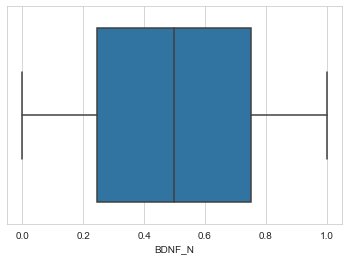

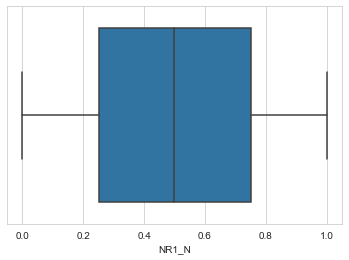

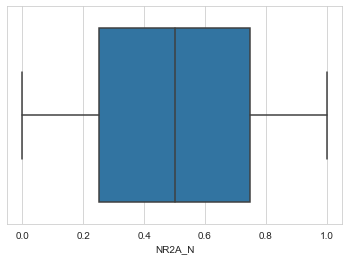

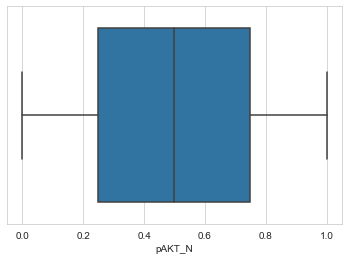

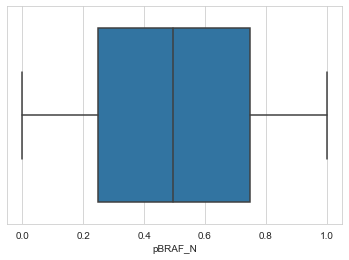

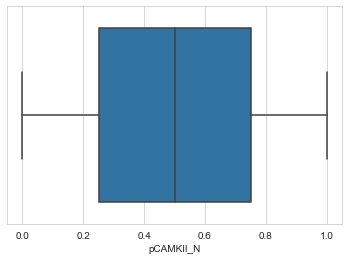

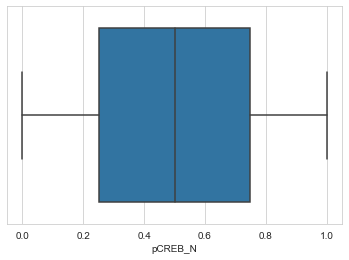

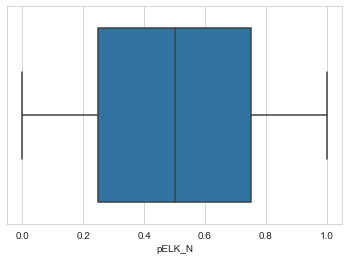

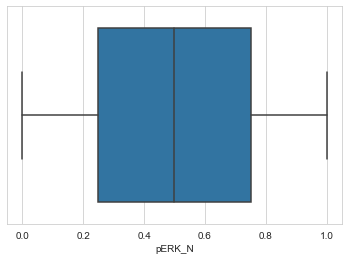

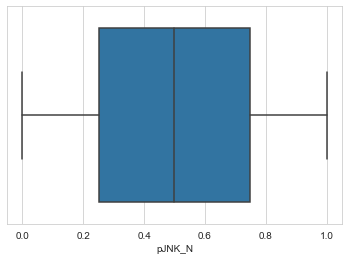

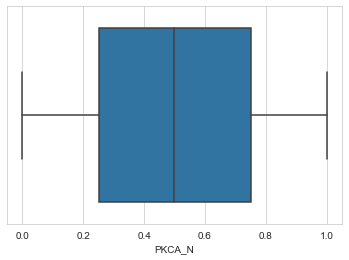

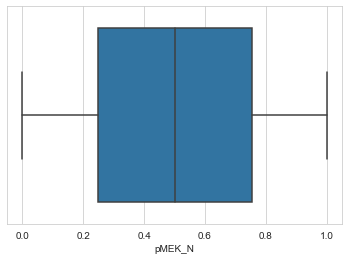

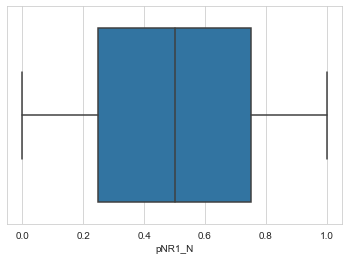

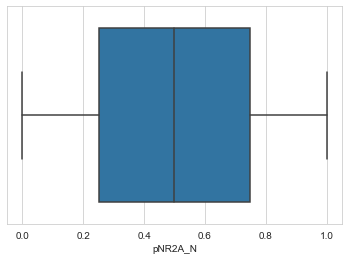

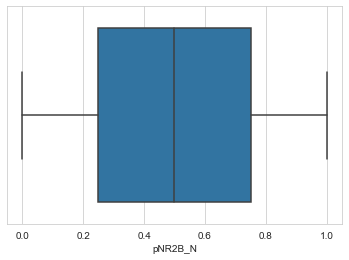

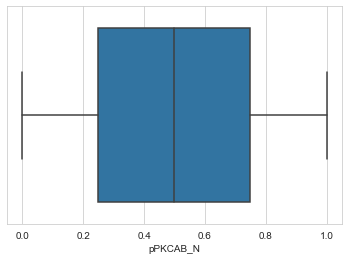

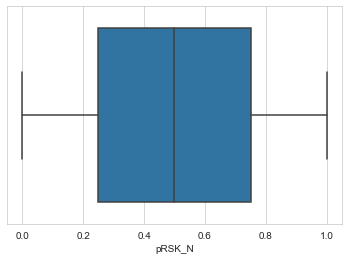

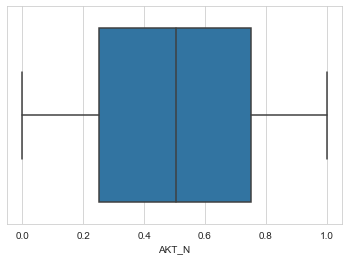

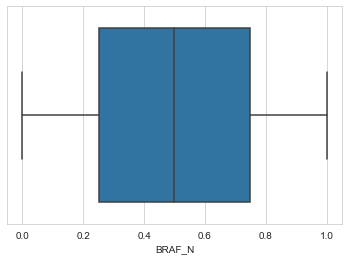

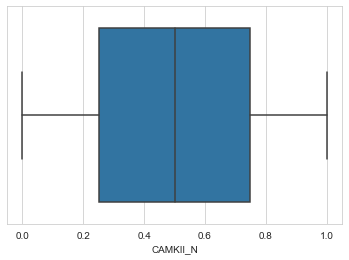

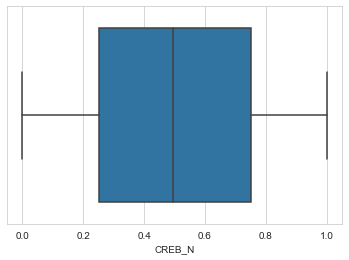

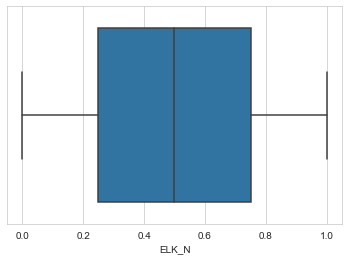

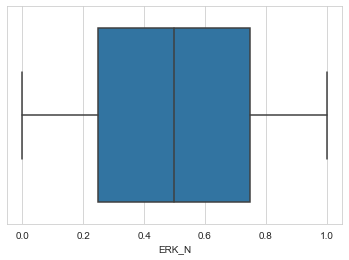

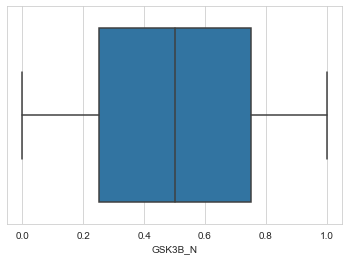

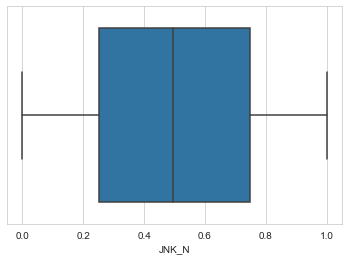

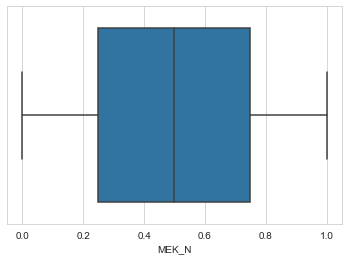

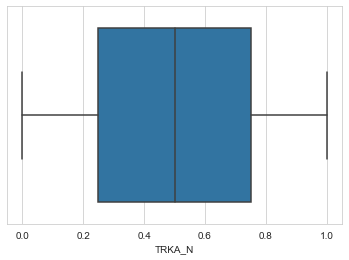

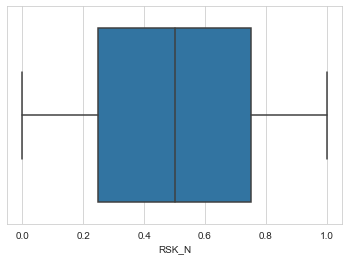

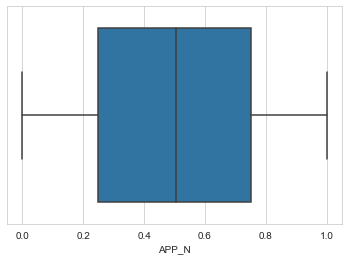

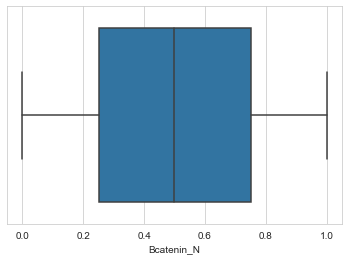

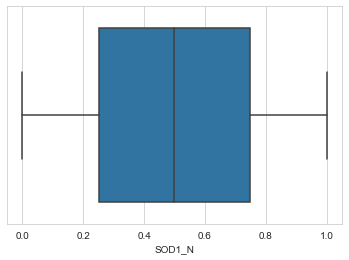

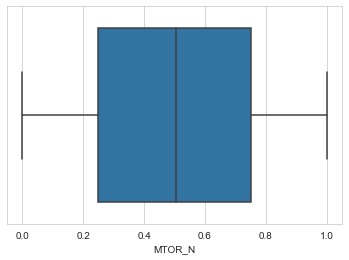

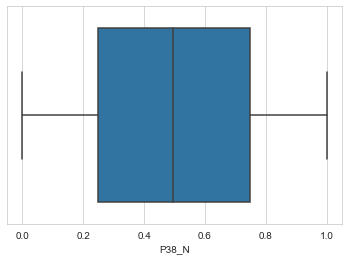

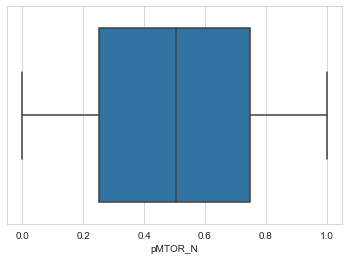

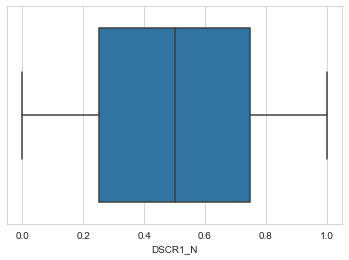

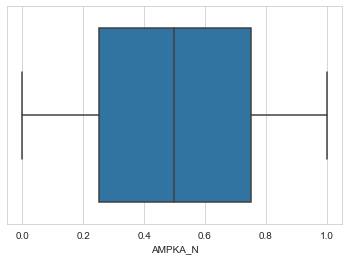

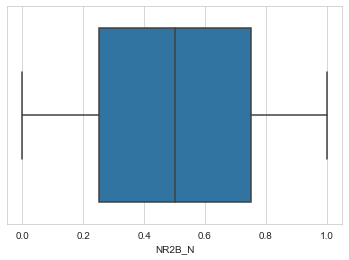

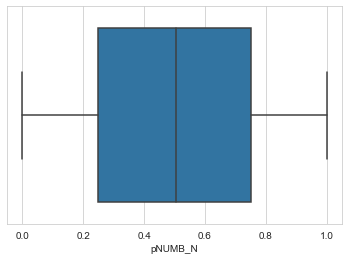

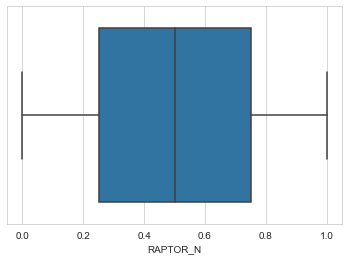

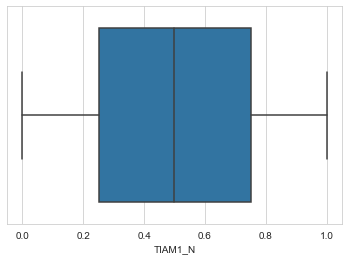

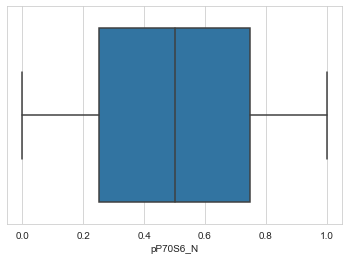

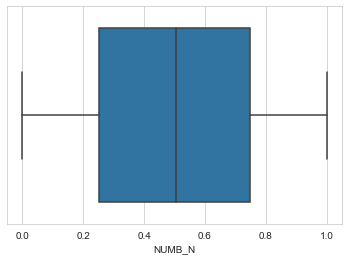

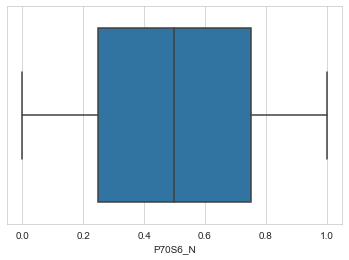

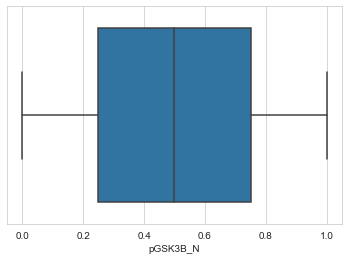

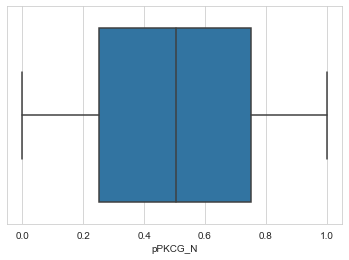

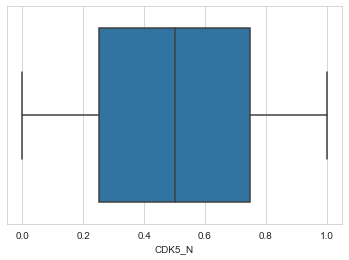

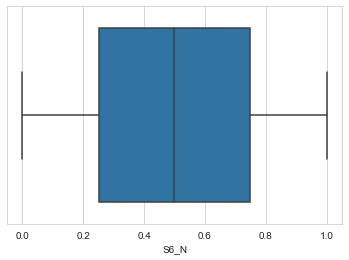

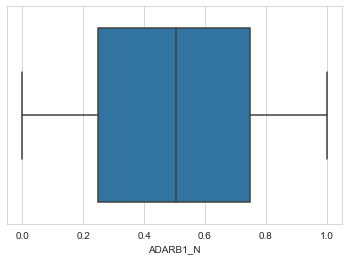

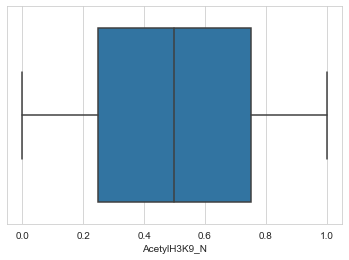

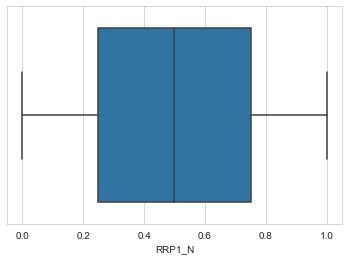

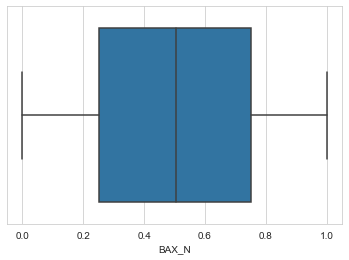

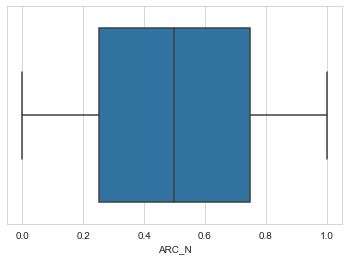

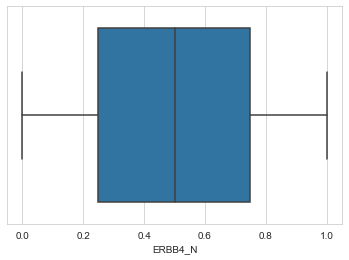

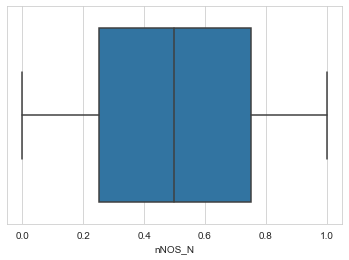

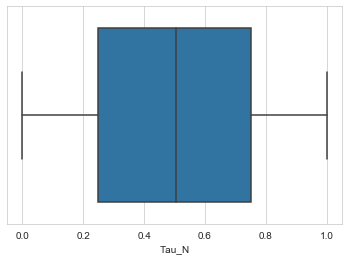

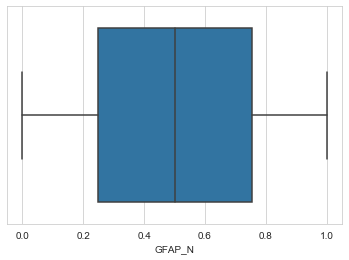

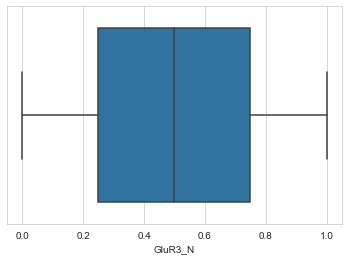

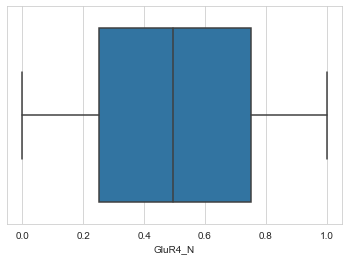

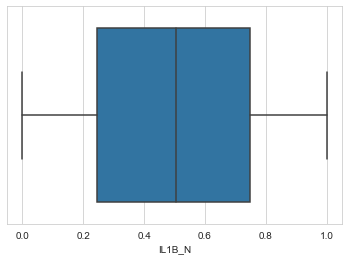

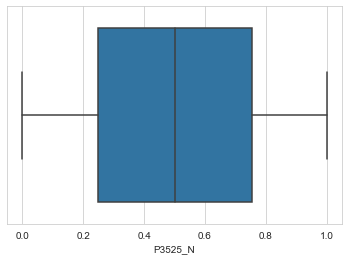

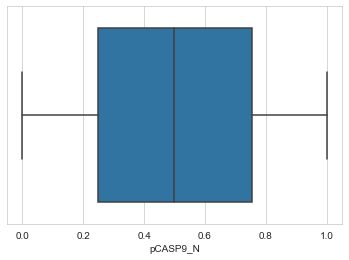

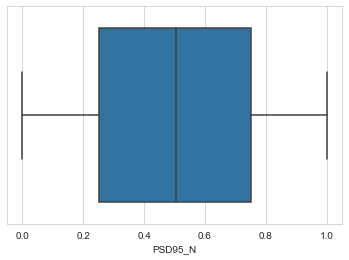

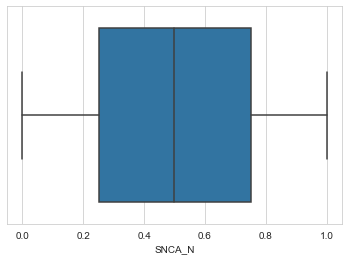

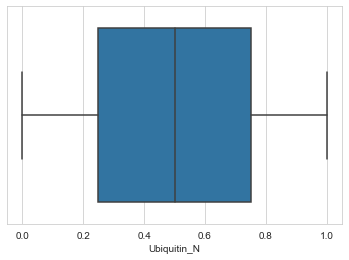

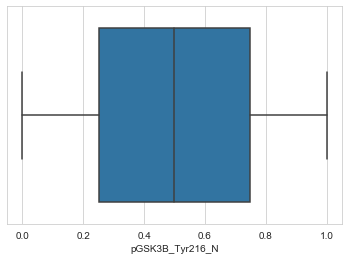

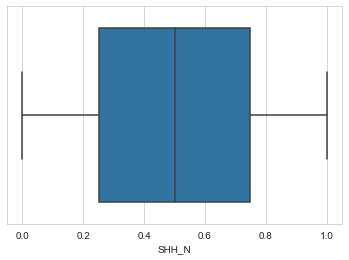

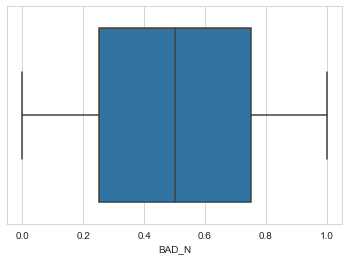

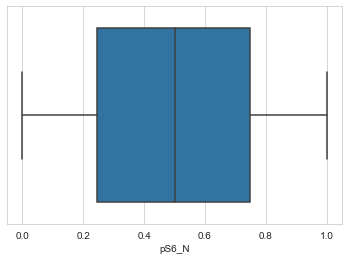

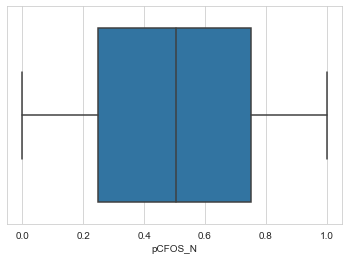

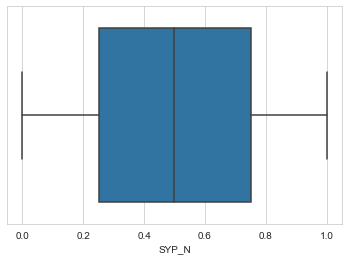

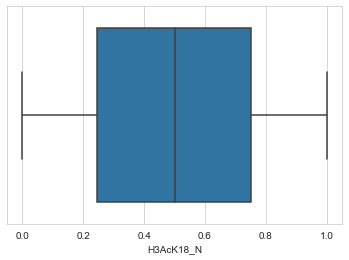

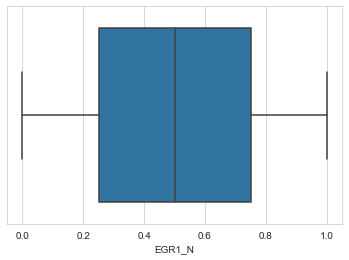

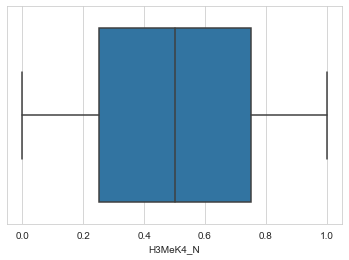

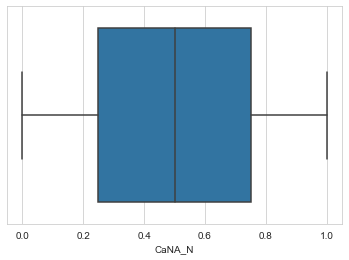

In [35]:
#REMOVING OUTLIERS
from scipy import stats 
#z = np.abs(stats.zscore(trainRG))
# z.mean()
# z.max()
# z.min()
# trainRG = trainRG[(z < 2.9).all(axis = 1)] # 2.9 3 sono buoni valori 
trainRG.shape

for column in trainRG.columns:
    sns.boxplot(x = trainRG[column])
    plt.show()
   


In [36]:
# uso il boxplot per vedere i valori che sono fuori dal range
for column in trainRG.columns:
    trainRG = trainRG[trainRG[column] < 2] # robust staler -2 2
    trainRG = trainRG[trainRG[column] > -2]
    #sns.boxplot(x = trainRG[column])
    #plt.show()


In [37]:
y = trainRG['SOD1_N']
trainRG.shape

(367, 76)

Possiamo vedere la distribuzione delle nostre features per capire quali sono le più importanti, dati con distribuzione simile a quella normale avranno sicuramente più utilità nella predizione di features 

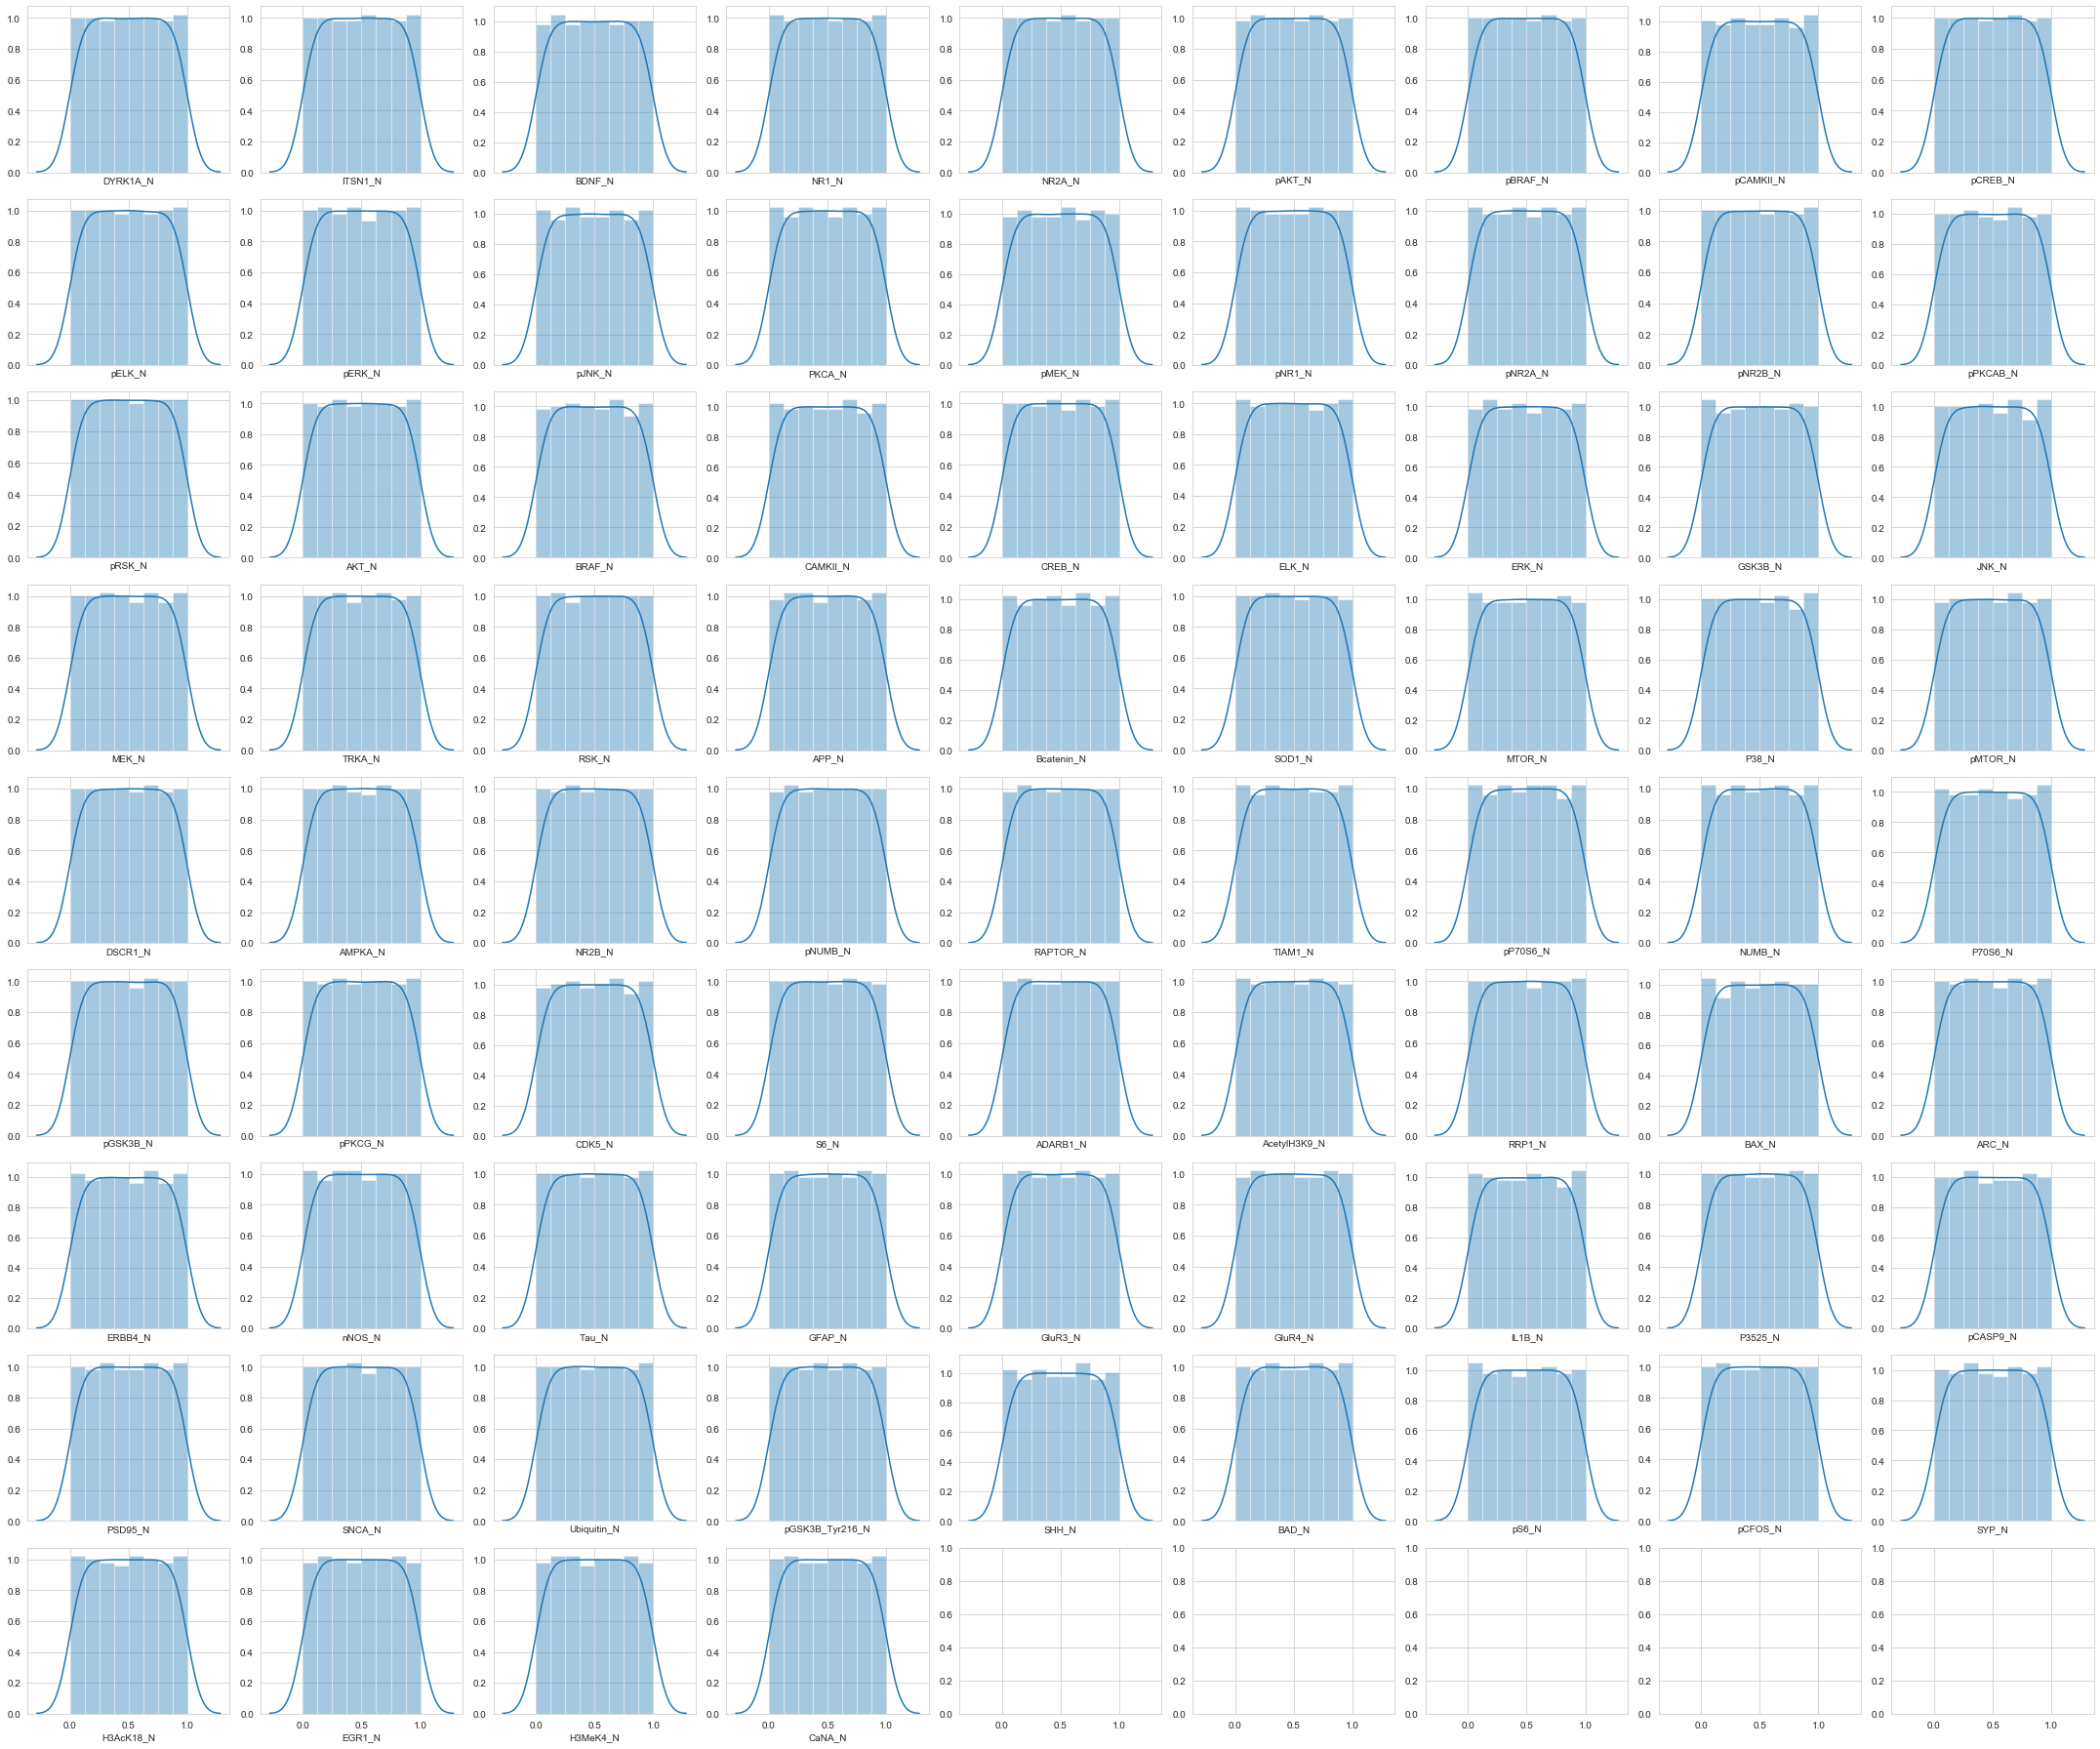

In [38]:
# Visualize the distribution of the data
def visualizza(data):
    rows = 9
    cols = 9
    f, ax = plt.subplots(rows, cols, figsize=(30, 25), sharex=True)
    col = data.columns
    index = 0
    for i in range(rows):
        for j in range(cols):
            if (index < data.shape[1]):
                sns.distplot(data[col[index]], ax = ax[i][j])
                index = index + 1
            else:
                break
    plt.tight_layout()

visualizza(trainRG)

In [39]:
corrMatReg = trainRG.corr()
# Correlation with the output variable
cor_target = abs(corrMatReg['SOD1_N']).drop('SOD1_N')
# Selecting the highly correlated features
relevant_features_2 = cor_target[cor_target > 0.405]
max(relevant_features_2)
relevant_features_2.index

0.6196201624078466

Index(['DYRK1A_N', 'pCAMKII_N', 'pERK_N', 'pNR2A_N', 'BRAF_N', 'MTOR_N',
       'CaNA_N'],
      dtype='object')

Noteremo che pERK_N and BRAF_N sono molto correlate ma sono anche correlate al target quindi non conviene toglierle

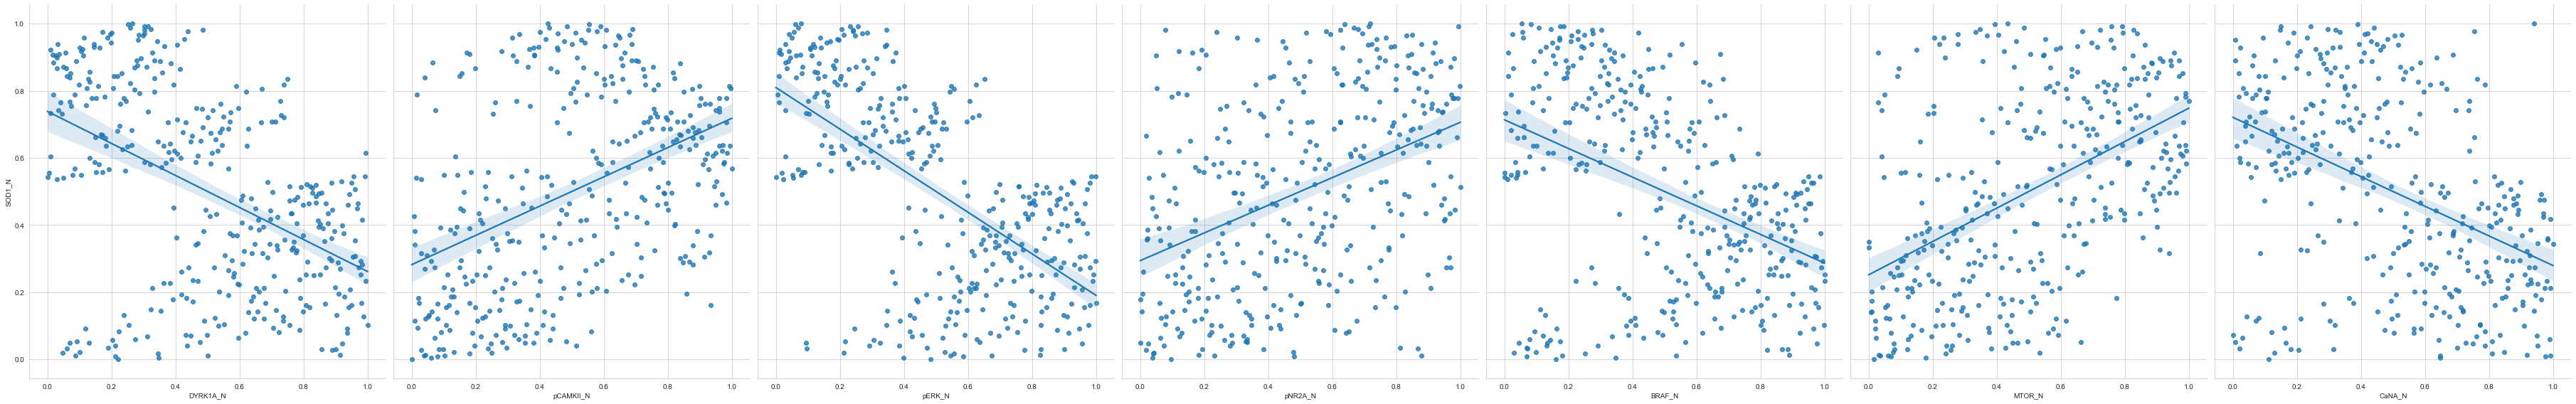

In [40]:
#f, axes = plt.subplots(9, 9, figsize=(7, 7), sharex=True)
sns.pairplot(trainRG, x_vars = relevant_features_2.index, 
             y_vars = 'SOD1_N', size = 8, aspect = .9, kind = 'reg') #, kind = 'reg'
plt.tight_layout()

In [41]:
corrMatReg = trainRG.corr()
upper = corrMatReg.where(np.triu(np.ones(corrMatReg.shape), k = 1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.78
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.85)]
to_drop
#sns.pairplot(trainRG[to_drop], diag_kind = 'hist', markers = '.', ) # , kind = 'reg'
#trainRG = trainRG.drop(columns = to_drop, axis = 1)

['pERK_N', 'BRAF_N']

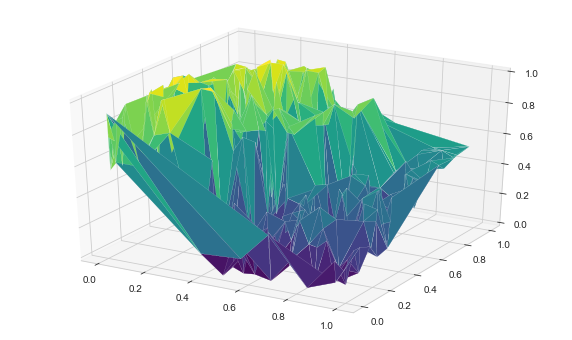

In [42]:
from matplotlib import interactive
#%matplotlib notebook 
fig = plt.figure(figsize=(10, 6))
interactive(True)
ax = fig.gca(projection='3d')
ax.plot_trisurf(trainRG['pERK_N'], trainRG['MTOR_N'], y, cmap = plt.cm.viridis, linewidth = 0.1)
plt.show()

In [43]:
trainRG = trainRG.drop(columns = 'SOD1_N', axis = 1)

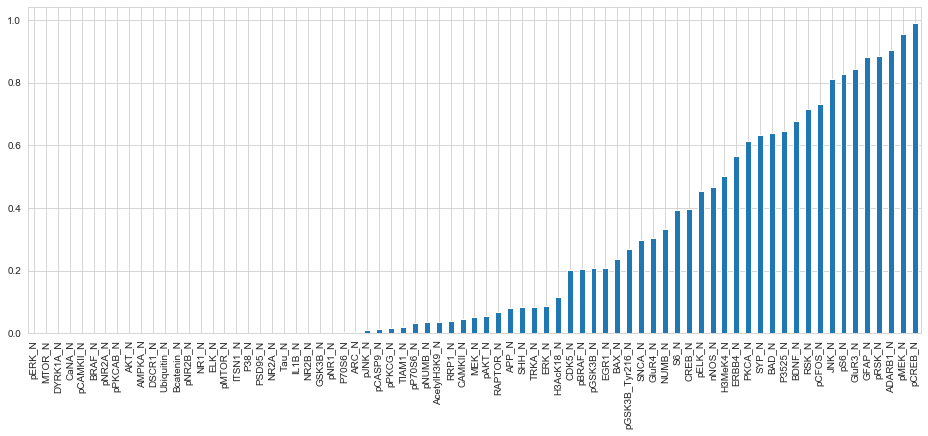

In [44]:
%matplotlib inline 
from sklearn.feature_selection import f_regression
sel = f_regression(trainRG, y)
# prima dimensione   F score
#la seconda dimensione p value delle features 
p_values = pd.Series(sel[1], name = 'p_val')
p_values.index = trainRG.columns
p_values_sort = p_values.sort_values() # potrei plottarew i p value
p_values_sort.plot.bar(figsize = (16, 6))

In [45]:
from sklearn.feature_selection import SelectKBest
selKBesst = SelectKBest(f_regression, 12).fit(trainRG, y)
X_new = selKBesst.transform(trainRG)
X_new = pd.DataFrame(X_new, columns = trainRG.columns[selKBesst.get_support()])

In [46]:
#p_values = p_values[p_values < 0.0001]
#len(p_values)
#p_values.index
#trainRG = trainRG[p_values.index]

In [47]:
#sns.pairplot(trainRG) # , kind='reg'

In [48]:
#reg = LinearRegression().fit(x_train, y_train)
#x_trainRG.shape
from sklearn.linear_model import Lasso, Ridge

x_train, x_validation, y_train, y_validation = train_test_split(X_new, y, 
                                                                test_size = 0.25)

r2_scorer = make_scorer(r2_score, greater_is_better = True)

scoreLin = cross_val_score(LinearRegression(), x_train, y_train, scoring = r2_scorer, cv = 10)
print("Regression: ", np.round(scoreLin.mean(),2))

scoreLasso = cross_val_score(Lasso(alpha = 0.001), x_train, y_train, scoring = r2_scorer, cv = 10)
print("Lasso: ", np.round(scoreLasso.mean(),2))

scoreRidge= cross_val_score(Ridge(alpha = 0.01, solver='saga'), x_train, y_train, scoring = r2_scorer, cv = 10)
print("Ridge: ", np.round(scoreRidge.mean(),2))
    
poly_int = PolynomialFeatures(degree = 2, include_bias = True, interaction_only=True).fit(x_train)
x_train_int = poly_int.transform(x_train)
x_validation_int = poly_int.transform(x_validation)

#print("X_train_small.shape", x_train.shape, " X_poly_train.shape", X_train_poly.shape)
#print("X_validation.shape", x_validation.shape, " X_poly_train.shape", X_test_poly.shape)
scorePol_int = cross_val_score(Ridge(alpha = 0.01, solver='saga'), x_train_int, y_train, scoring = r2_scorer, cv = 10)
print("Pol_inter: ", np.round(scorePol_int.mean(),2))


poly = PolynomialFeatures(degree = 2, include_bias = True, interaction_only=False).fit(x_train)
x_train_poly = poly.transform(x_train)
x_validation_poly = poly.transform(x_validation)

scorePol = cross_val_score(Ridge(alpha = 1.0, solver='saga'), x_train_poly, y_train, scoring = r2_scorer, cv = 10)
print("Pol: ", np.round(scorePol.mean(),2))

Regression:  0.7
Lasso:  0.69
Ridge:  0.7
Pol_inter:  0.76
Pol:  0.75


In [49]:
reg = LinearRegression().fit(x_train, y_train)
lasso = Lasso(alpha = 0.015).fit(x_train, y_train)
ridge = Ridge(alpha = 0.015).fit(x_train, y_train)
ply_int = LinearRegression().fit(x_train_int, y_train)
ply = LinearRegression().fit(x_train_poly, y_train)
print("Regression: ", np.round(r2_score(y_validation, reg.predict(x_validation)),2))
print("Lasso: ", np.round(r2_score(y_validation, lasso.predict(x_validation)),2))
print("Ridge: ", np.round(r2_score(y_validation, ridge.predict(x_validation)),2))
print("Poly_inter: ", np.round(r2_score(y_validation, ply_int.predict(x_validation_int)),2))
print("Poly: ", np.round(r2_score(y_validation, ply.predict(x_validation_poly)),2))

Regression:  0.7
Lasso:  0.59
Ridge:  0.7
Poly_inter:  0.68
Poly:  0.72


In [50]:
# NON è più questo il best 

parameters = {'alpha' : np.linspace(0.01, 1, 10000)}
clf_inter = GridSearchCV(Ridge(), parameters, n_jobs=-1)
clf_inter.fit(x_train_poly, y_train)
print("Poly: ", np.round(r2_score(y_validation, clf_inter.best_estimator_.predict(x_validation_poly)),2))

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.01      , 0.01009901, 0.01019802, ..., 0.99980198, 0.99990099,
       1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Poly:  0.75


In [51]:
clf_inter.best_estimator_

Ridge(alpha=0.07168316831683168, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)